# **Advanced Models Debagree Corpus (Word) Analysis**

## **Normalization After Pooling**

* word_lim = 10
* window size = 5
* $\to$ only analyze words with count word_count > 5

In [1]:

!pip install sentence-transformers==2.2.2
!pip install huggingface_hub ==0.25.1

!pip install wordcloud
!pip install adjustText
!pip install pingouin

  Using cached sentence_transformers-2.2.2-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.4 MB/s eta 0:00:00
  Using cached torch-2.8.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached sentencepiece-0.2.1-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (10 kB)
  Using cached huggingface_hub-0.34.4-py3-none-any.whl.metadata (14 kB)
  Using cached hf_xet-1.1.7-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (703 bytes)
  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.ma

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
#from sentence_transformers import SentenceTransformer
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import json
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches

from sklearn.feature_extraction.text import TfidfVectorizer
import math
from adjustText import adjust_text
from scipy.stats import pearsonr
from numpy import linalg as LA
from scipy.stats import zscore
import zipfile

In [3]:
# file paths
nltk_data_path = '../nltk_data'
nltk.data.path.append(nltk_data_path) # set path
nltk.download('stopwords', download_dir=nltk_data_path) # download to path
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to ../nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# import models

# AFTER POOL

finetuned_model = SentenceTransformer('../../00_embedding_models/after_pool_finetuned_sentence_model_wordlim_10_window_5')
selfbuild_model = SentenceTransformer('../../00_embedding_models/after_pool_self_build_sentence_model_wordlim_10_window_5')

# import dictionaries
evidence = pd.read_csv("../../dictionaries_emi/evidence_lexicon.csv")
intuition = pd.read_csv("../../dictionaries_emi/intuition_lexicon.csv")


NameError: name 'SentenceTransformer' is not defined

## **Dictionary Embeddings**

In [ ]:
# no evidence and no intuition keyword in stopwords
evidence[evidence['evidence_keywords'].isin(stop_words)]
intuition[intuition['intuition_keywords'].isin(stop_words)]

In [ ]:
# Get embeddings for dictionary words

finetuned_evidence_embeddings = finetuned_model.encode(evidence['evidence_keywords'])
finetuned_intuition_embeddings = finetuned_model.encode(intuition['intuition_keywords'])

self_evidence_embeddings = selfbuild_model.encode(evidence['evidence_keywords'])
self_intuition_embeddings = selfbuild_model.encode(intuition['intuition_keywords'])



In [ ]:

# their norm
evidence_norms_ft = np.linalg.norm(finetuned_evidence_embeddings, axis=1)
intuition_norms_ft = np.linalg.norm(finetuned_intuition_embeddings, axis=1)

evidence_norms_sb = np.linalg.norm(self_evidence_embeddings, axis=1)
intuition_norms_sb = np.linalg.norm(self_intuition_embeddings, axis=1)


# z-scores
evidence_zscores_ft = zscore(evidence_norms_ft)
intuition_zscores_ft = zscore(intuition_norms_ft)

evidence_zscores_sb = zscore(evidence_norms_sb)
intuition_zscores_sb = zscore(intuition_norms_sb)


# Make df
df_evidence = pd.DataFrame({
    "word": evidence['evidence_keywords'],
    "embedding_ft": list(finetuned_evidence_embeddings), 
    "embedding_sb": list(self_evidence_embeddings), 
    "norm_ft": evidence_norms_ft,
    "norm_sb": evidence_norms_sb,
    #"z-score_ft": evidence_zscores_ft,
    #"z-score_sb": evidence_zscores_sb
})


df_intuition = pd.DataFrame({
    "word": intuition['intuition_keywords'],
    "embedding_ft": list(finetuned_intuition_embeddings), 
    "embedding_sb": list(self_intuition_embeddings), 
    "norm_ft": intuition_norms_ft,
    "norm_sb": intuition_norms_sb,
    #"z-score_ft": intuition_zscores_ft,
    #"z-score_sb": intuition_zscores_sb
})





In [10]:
df_evidence
df_intuition

word                                       embedding_ft  \
0          belief  [-0.0075392807, -0.07178262, 0.066346, 0.01491...   
1         believe  [-0.14456914, -0.12517047, 0.0073199975, -0.04...   
2           bogus  [-0.031176435, 0.02730458, -0.09395502, 0.0104...   
3    common sense  [-0.030430658, -0.1533699, -0.0528886, -0.0164...   
4        distrust  [-0.025816705, -0.03155031, -0.027444234, -0.1...   
5           doubt  [-0.024575498, -0.08904101, -0.105645746, 0.01...   
6            fake  [-0.05571608, -0.020713903, -0.09340723, -0.03...   
7       fake news  [-0.067898445, 0.013978101, -0.043538406, -0.0...   
8         feeling  [-0.031783108, -0.08968694, 0.07686389, -0.015...   
9         genuine  [-0.09000086, 0.005017711, 0.026022993, -0.009...   
10          guess  [-0.077573344, -0.1505027, -0.027603991, -0.03...   
11            gut  [-0.08795755, -0.03409369, 0.021819342, 0.0392...   
12       instinct  [0.0014449556, 0.03122885, 0.06964892, -0.0391...   
13      intuition  [-0.013304326, -0.04064394, 0.008408305, -0.02...   
14            lie  [-0.17252313, -0.03440552, -0.045408685, 0.091...   
15       mistrust  [-0.045716967, -0.023826472, 0.0038906822, -0....   
16        opinion  [-0.04500219, -0.054408092, 0.013949481, 0.043...   
17    perspective  [0.034077894, 0.023717035, 0.059219018, -0.083...   
18          phony  [-0.076077126, 0.012122479, -0.048804708, 0.01...   
19  point of view  [-0.041815832, -0.08809167, 0.024790531, -0.08...   
20     propaganda  [-0.07188968, 0.039379507, 0.019833872, -0.020...   
21          sense  [-0.073550604, -0.12005675, 0.015902597, -0.04...   
22      suspicion  [0.019693896, -0.029127905, -0.08982011, -0.03...   
23           view  [-0.008572271, -0.077193156, 0.0298713, -0.070...   
24      viewpoint  [-0.05473504, -0.02615863, 0.07212138, -0.0668...   
25          wrong  [-0.1514677, -0.083890244, -0.058557022, 0.031...   
26         advice  [0.022380974, 0.032218125, 0.02184442, 0.02645...   
27        deceive  [-0.08560867, -0.074584514, -0.07421709, -0.01...   
28      deception  [-0.102047734, 0.037946455, 0.017588422, 0.028...   
29      dishonest  [-0.10779317, -0.032820642, -0.040517822, 0.04...   
30     dishonesty  [-0.063474946, -0.007528123, -0.026636701, 0.0...   
31        mislead  [-0.14245144, -0.09689436, -0.07727272, 0.0149...   
32       mistaken  [-0.06021292, -0.13544141, -0.014514777, 0.067...   
33        suggest  [-0.09563164, -0.16292273, -0.07192603, -0.046...   
34     suggestion  [-0.0017678448, -0.14020595, 0.053004242, 0.00...   

                                         embedding_sb  norm_ft  norm_sb  
0   [-0.01910139, 0.016191622, 0.012423026, -0.000...      1.0      1.0  
1   [0.0031847502, 0.034254186, -0.031160157, -0.0...      1.0      1.0  
2   [0.044025585, 0.061845653, -0.119277336, 0.062...      1.0      1.0  
3   [0.0026562898, 0.0016142175, 0.043993805, 0.00...      1.0      1.0  
4   [-0.0025138098, 0.028608538, -0.017959578, -0....      1.0      1.0  
5   [-0.026670137, 0.009226528, -0.020877007, -0.0...      1.0      1.0  
6   [0.047672693, 0.008144061, 0.055483293, 0.0543...      1.0      1.0  
7   [0.0056715636, -0.001750626, 0.06407066, -0.03...      1.0      1.0  
8   [0.06544729, 0.055427957, 0.07317751, -0.00757...      1.0      1.0  
9   [-0.08150366, -0.03803336, -0.06731406, 0.0217...      1.0      1.0  
10  [0.0012672965, -0.0416251, 0.06311406, 0.02179...      1.0      1.0  
11  [0.038906828, 0.05646613, -0.10572985, -0.0014...      1.0      1.0  
12  [0.03607853, 0.0014808278, 0.009498539, 0.0304...      1.0      1.0  
13  [-0.0022421787, -0.063572876, -0.04659524, -0....      1.0      1.0  
14  [-0.05593381, 0.068150096, -0.12674136, -0.135...      1.0      1.0  
15  [0.040490776, -0.001798296, -0.058836658, -0.0...      1.0      1.0  
16  [-0.07288851, -0.039266977, -0.026676778, -0.0...      1.0      1.0  
17  [-0.08003525, -0.14432687, -0.017843325, -0.09...      1.0      1.0  
18  [0.0654766

In [ ]:
# mean of word embeddings, then normalize --> concept embedding

evidence_dim_ft = df_evidence['embedding_ft'].mean(axis = 0) / LA.norm(df_evidence['embedding_ft'].mean(axis = 0))
intuition_dim_ft = df_intuition['embedding_ft'].mean(axis = 0) / LA.norm(df_intuition['embedding_ft'].mean(axis = 0))

evidence_dim_sb = df_evidence['embedding_sb'].mean(axis = 0) / LA.norm(df_evidence['embedding_sb'].mean(axis = 0))
intuition_dim_sb = df_intuition['embedding_sb'].mean(axis = 0) / LA.norm(df_intuition['embedding_sb'].mean(axis = 0))

In [ ]:
evidence_dim_ft

***

## **Import Documents**

In [ ]:
# texts, not filtered to only include words, which are appearing often enaugh or in GloVe
training_texts_all = pd.read_csv("../../../preprocess_outputs/tokens_reddit.csv")
training_texts_all

In [ ]:
# filtered sentences, used for finetuning
sentences = pd.read_csv("../../../preprocess_outputs/reddit_txt_path_wordlim_10.txt", header = None)
sentences.rename(columns = {0 : 'text'}, inplace = True)
sentences

In [ ]:
# merge
# make string and split
# compute length

training_texts_all = training_texts_all[['id']].merge(sentences, left_index = True, right_index = True)
training_texts_all['text'] = training_texts_all['text'].apply(lambda x : str(x))
training_texts_all['len'] = training_texts_all['text'].apply(lambda x: len(x.split()))
training_texts_all

# save
training_texts_all.to_csv("output/training_texts_all.csv", index = False)

In [ ]:
training_texts_all = pd.read_csv("output/training_texts_all.csv")

#### Nr. of training texts

In [17]:
len(training_texts_all)

7035721


## **Check most frequent words**

In [ ]:
word_freq_df = pd.read_csv("../../00_embedding_models/word_frequencies_reddit.csv")
word_freq_df['word'] = word_freq_df['word'].apply(lambda x : str(x))

# relevant only >= 10 (or in GloVe embeddings)
word_freq_df = word_freq_df[word_freq_df['frequency'] >= 10].reset_index(drop = True)
word_freq_df

#### Check number of words, overall

In [5]:
word_freq_df['frequency'].sum()

123898970

## **Count Dictionary words in corpus**

In [20]:
print("Evidence words: ", len(evidence))
print("Intuition words", len(intuition))

Evidence words:  49
Intuition words 35


In [ ]:
E_in_corpus = word_freq_df[word_freq_df['word'].isin(evidence['evidence_keywords'])]
I_in_corpus = word_freq_df[word_freq_df['word'].isin(intuition['intuition_keywords'])]

print(len(E_in_corpus))
print(len(I_in_corpus)) # missing three intuition words


intuition[~intuition['intuition_keywords'].isin(I_in_corpus['word'])]

***

**Interpretation**

* Intuition keywords which are made up of multiple words, but I am looking at tokens only

***

In [22]:
top_10_words = word_freq_df.head(10)
top_10_words['type'] = "top_10"

E_in_corpus["type"] = "evidence_keyword"
I_in_corpus["type"] = "intuition_keyword"

E_plot = pd.concat([top_10_words, E_in_corpus]).reset_index(drop = True).sort_values(by = "frequency", ascending = False)
I_plot = pd.concat([top_10_words, I_in_corpus]).reset_index(drop = True).sort_values(by = "frequency", ascending = False)

/tmp/ipykernel_397/1484347116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_words['type'] = "top_10"
/tmp/ipykernel_397/1484347116.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_in_corpus["type"] = "evidence_keyword"
/tmp/ipykernel_397/1484347116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [23]:
print("Count of evidence keywords in corpus:", E_plot[E_plot['type'] == "evidence_keyword"]['frequency'].sum())
print("Count of intuition keywords in corpus:", I_plot[I_plot['type'] == "intuition_keyword"]['frequency'].sum())

Count of evidence keywords in corpus: 1667090
Count of intuition keywords in corpus: 744353


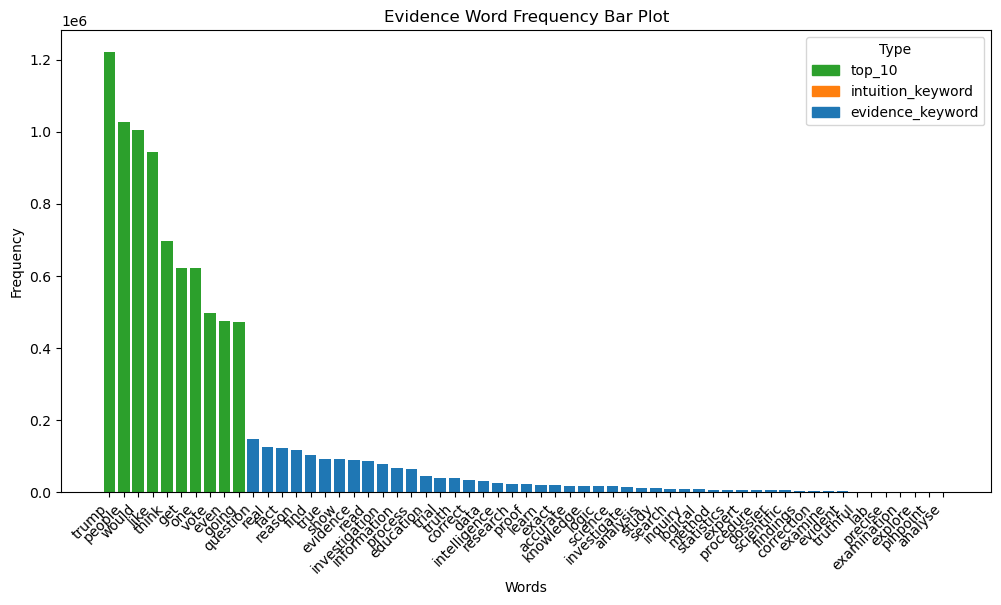

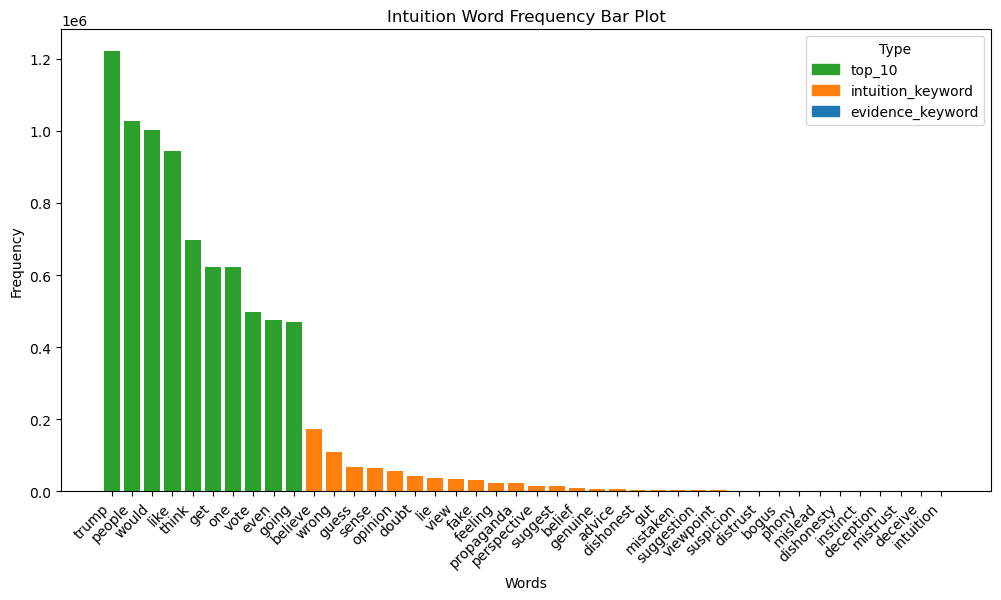

In [24]:
color_mapping = {"top_10": "#2CA02C", "intuition_keyword": "#FF7F0E", "evidence_keyword": "#1F77B4"} 

E_plot["color"] = E_plot["type"].map(color_mapping)
I_plot["color"] = I_plot["type"].map(color_mapping)

# Evidence
plt.figure(figsize=(12, 6))
bars = plt.bar(E_plot["word"], E_plot["frequency"], color=E_plot["color"])

legend_handles = [patches.Patch(color=color, label=label) for label, color in color_mapping.items()]
plt.legend(handles=legend_handles, title="Type", loc="upper right")

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Evidence Word Frequency Bar Plot")
plt.xticks(rotation=45, ha="right")
plt.show()

# Intuition
plt.figure(figsize=(12, 6))
bars = plt.bar(I_plot["word"], I_plot["frequency"], color=I_plot["color"])

legend_handles = [patches.Patch(color=color, label=label) for label, color in color_mapping.items()]
plt.legend(handles=legend_handles, title="Type", loc="upper right")

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Intuition Word Frequency Bar Plot")
plt.xticks(rotation=45, ha="right")
plt.show()

## **Encode Corpus Words and Filter Clipping Words**

In [58]:
# encode dictionaries above

In [25]:
# encode individual words

finetuned_word_embeddings = finetuned_model.encode(word_freq_df['word'])
self_word_embeddings = selfbuild_model.encode(word_freq_df['word'])

word_freq_df['finetuned_word_embeddings'] = list(finetuned_word_embeddings)
word_freq_df['self_word_embeddings'] = list(self_word_embeddings)

word_freq_df

word  frequency  len  \
0           trump    1220659    5   
1          people    1028121    6   
2           would    1003710    5   
3            like     943124    4   
4           think     697822    5   
...           ...        ...  ...   
70444    lofgrens         10    8   
70445    whirring         10    8   
70446  classicals         10   10   
70447  reoccuring         10   10   
70448       coyne         10    5   

                               finetuned_word_embeddings  \
0      [-0.03138235, -0.0026199205, 0.016560156, -0.0...   
1      [-0.14400238, -0.017160604, -0.009866504, -0.0...   
2      [-0.049465023, -0.10319191, 0.004725004, -0.04...   
3      [-0.13949797, -0.065836616, -0.07623981, -0.04...   
4      [-0.13961822, -0.14024219, -0.032561995, -0.05...   
...                                                  ...   
70444  [0.04669816, 0.07317746, -0.0033538197, 0.0432...   
70445  [-0.029881677, -0.01952807, -0.071157776, -0.1...   
70446  [0.03468389, 0.035784785, -0.04271318, -0.0524...   
70447  [-0.01376444, -0.04525928, -0.14281829, 0.0524...   
70448  [0.1209516, 0.0064495406, -0.075554155, 0.0410...   

                                    self_word_embeddings  
0      [0.06490105, -0.030755918, 0.07042432, 0.04734...  
1      [-0.054518852, -0.008642221, -0.00013800293, -...  
2      [-0.07406097, -0.03809616, 0.070128635, 0.0118...  
3      [-0.07020836, -0.017374355, -0.09395944, 0.065...  
4      [0.0047624307, -0.04358237, -0.06306772, 0.047...  
...                                                  ...  
70444  [-0.00041436727, 0.031691, 0.001026782, 0.0095...  
70445  [0.03879461, -0.010755048, 0.044968367, 0.1001...  
70446  [-0.012721898, -0.108203694, -0.027846154, -0....  
70447  [-0.039768342, 0.06969618, -0.033285983, -0.03...  
70448  [0.04587843, -0.061493903, 0.034979586, -0.075...  

[70449 rows x 5 columns]

In [26]:
def compute_cosine_similarity(row, col, reference_dict):
    return cosine_similarity(row[col].reshape(1, -1), reference_dict.reshape(1, -1))[0][0]
    

In [29]:
# compute cosine similarity

word_freq_df["finetuned_word_I"] = word_freq_df.apply(lambda row: compute_cosine_similarity(row, "finetuned_word_embeddings", intuition_dim_ft), axis=1)
word_freq_df["finetuned_word_E"] = word_freq_df.apply(lambda row: compute_cosine_similarity(row, "finetuned_word_embeddings", evidence_dim_ft), axis=1)

word_freq_df["self_word_I"] = word_freq_df.apply(lambda row: compute_cosine_similarity(row, "self_word_embeddings", intuition_dim_sb), axis=1)
word_freq_df["self_word_E"] = word_freq_df.apply(lambda row: compute_cosine_similarity(row, "self_word_embeddings", evidence_dim_sb), axis=1)


word_freq_df

word  frequency  len  \
0           trump    1220659    5   
1          people    1028121    6   
2           would    1003710    5   
3            like     943124    4   
4           think     697822    5   
...           ...        ...  ...   
70444    lofgrens         10    8   
70445    whirring         10    8   
70446  classicals         10   10   
70447  reoccuring         10   10   
70448       coyne         10    5   

                               finetuned_word_embeddings  \
0      [-0.03138235, -0.0026199205, 0.016560156, -0.0...   
1      [-0.14400238, -0.017160604, -0.009866504, -0.0...   
2      [-0.049465023, -0.10319191, 0.004725004, -0.04...   
3      [-0.13949797, -0.065836616, -0.07623981, -0.04...   
4      [-0.13961822, -0.14024219, -0.032561995, -0.05...   
...                                                  ...   
70444  [0.04669816, 0.07317746, -0.0033538197, 0.0432...   
70445  [-0.029881677, -0.01952807, -0.071157776, -0.1...   
70446  [0.03468389, 0.035784785, -0.04271318, -0.0524...   
70447  [-0.01376444, -0.04525928, -0.14281829, 0.0524...   
70448  [0.1209516, 0.0064495406, -0.075554155, 0.0410...   

                                    self_word_embeddings  finetuned_word_I  \
0      [0.06490105, -0.030755918, 0.07042432, 0.04734...          0.383221   
1      [-0.054518852, -0.008642221, -0.00013800293, -...          0.340338   
2      [-0.07406097, -0.03809616, 0.070128635, 0.0118...          0.225115   
3      [-0.07020836, -0.017374355, -0.09395944, 0.065...          0.276800   
4      [0.0047624307, -0.04358237, -0.06306772, 0.047...          0.559520   
...                                                  ...               ...   
70444  [-0.00041436727, 0.031691, 0.001026782, 0.0095...         -0.068512   
70445  [0.03879461, -0.010755048, 0.044968367, 0.1001...         -0.018869   
70446  [-0.012721898, -0.108203694, -0.027846154, -0....          0.080467   
70447  [-0.039768342, 0.06969618, -0.033285983, -0.03...          0.027779   
70448  [0.04587843, -0.061493903, 0.034979586, -0.075...          0.071631   

       finetuned_word_E  self_word_I  self_word_E  
0              0.248026     0.011930    -0.075950  
1              0.217950     0.032023    -0.075853  
2              0.253686    -0.089805    -0.021537  
3              0.165570     0.063724    -0.073947  
4              0.381980     0.282668     0.035809  
...                 ...          ...          ...  
70444          0.033004    -0.041946     0.065054  
70445         -0.100058     0.043625     0.001492  
70446          0.054090     0.077077     0.093413  
70447         -0.027500     0.063547     0.010703  
70448          0.095652    -0.048543     0.042333  

[70449 rows x 9 columns]

## **Export**

In [29]:
word_freq_df.to_csv("output/word_freq_df_encoded.csv", index = False)

In [3]:
word_freq_df = pd.read_csv("output/word_freq_df_encoded.csv")
word_freq_df

word  frequency  len  \
0           trump    1220659    5   
1          people    1028121    6   
2           would    1003710    5   
3            like     943124    4   
4           think     697822    5   
...           ...        ...  ...   
70444    lofgrens         10    8   
70445    whirring         10    8   
70446  classicals         10   10   
70447  reoccuring         10   10   
70448       coyne         10    5   

                               finetuned_word_embeddings  \
0      [-3.13823484e-02 -2.61992053e-03  1.65601559e-...   
1      [-0.14400238 -0.0171606  -0.0098665  -0.057251...   
2      [-0.04946502 -0.10319191  0.004725   -0.045335...   
3      [-1.39497966e-01 -6.58366159e-02 -7.62398094e-...   
4      [-0.13961822 -0.14024219 -0.032562   -0.052419...   
...                                                  ...   
70444  [ 4.66981605e-02  7.31774569e-02 -3.35381972e-...   
70445  [-0.02988168 -0.01952807 -0.07115778 -0.107075...   
70446  [ 0.03468389  0.03578478 -0.04271318 -0.052482...   
70447  [-1.37644401e-02 -4.52592783e-02 -1.42818287e-...   
70448  [ 0.1209516   0.00644954 -0.07555415  0.041022...   

                                    self_word_embeddings  finetuned_word_I  \
0      [ 0.06490105 -0.03075592  0.07042432  0.047348...          0.383221   
1      [-5.45188524e-02 -8.64222087e-03 -1.38002928e-...          0.340338   
2      [-7.40609691e-02 -3.80961597e-02  7.01286346e-...          0.225115   
3      [-0.07020836 -0.01737436 -0.09395944  0.065777...          0.276800   
4      [ 0.00476243 -0.04358237 -0.06306772  0.047155...          0.559520   
...                                                  ...               ...   
70444  [-0.00041437  0.031691    0.00102678  0.009565...         -0.068512   
70445  [ 3.87946106e-02 -1.07550481e-02  4.49683666e-...         -0.018869   
70446  [-1.27218980e-02 -1.08203694e-01 -2.78461538e-...          0.080467   
70447  [-0.03976834  0.06969618 -0.03328598 -0.035773...          0.027779   
70448  [ 4.58784290e-02 -6.14939034e-02  3.49795856e-...          0.071631   

       finetuned_word_E  self_word_I  self_word_E  
0              0.248026     0.011930    -0.075950  
1              0.217950     0.032023    -0.075854  
2              0.253686    -0.089805    -0.021537  
3              0.165570     0.063724    -0.073947  
4              0.381980     0.282668     0.035809  
...                 ...          ...          ...  
70444          0.033004    -0.041946     0.065054  
70445         -0.100058     0.043625     0.001492  
70446          0.054090     0.077077     0.093413  
70447         -0.027500     0.063547     0.010703  
70448          0.095652    -0.048543     0.042333  

[70449 rows x 9 columns]

**What is relevant**

* Encode all words with the two post-pool-normalize models
* When encoding sentences, I am taking each word's embedding, and average these
    * but previously, make a list of words, with a negative E and I similarity $\to$ no interpretation, remove them 
    * take a sentence, and all it's words, and only encode and average words, that have no negative similarity

***
***
# **Analysis**

In [4]:

word_freq_df_finetuned = word_freq_df[["word", "frequency", "len", "finetuned_word_embeddings", "finetuned_word_I", 
                                       "finetuned_word_E"]].sort_values(by = "frequency", ascending = False).reset_index(drop = True)

word_freq_df_self = word_freq_df[["word", "frequency", "len", "self_word_embeddings", "self_word_I", 
                                  "self_word_E"]].sort_values(by = "frequency", ascending = False).reset_index(drop = True)



In [5]:

word_freq_df_finetuned
word_freq_df_self

word  frequency  len  \
0           trump    1220659    5   
1          people    1028121    6   
2           would    1003710    5   
3            like     943124    4   
4           think     697822    5   
...           ...        ...  ...   
70444  analogized         10   10   
70445  cheesiness         10   10   
70446        cany         10    4   
70447        cond         10    4   
70448  sororities         10   10   

                                    self_word_embeddings  self_word_I  \
0      [ 0.06490105 -0.03075592  0.07042432  0.047348...     0.011930   
1      [-5.45188524e-02 -8.64222087e-03 -1.38002928e-...     0.032023   
2      [-7.40609691e-02 -3.80961597e-02  7.01286346e-...    -0.089805   
3      [-0.07020836 -0.01737436 -0.09395944  0.065777...     0.063724   
4      [ 0.00476243 -0.04358237 -0.06306772  0.047155...     0.282668   
...                                                  ...          ...   
70444  [ 3.51492949e-02  4.22521979e-02  3.11132353e-...    -0.025272   
70445  [ 0.06819527 -0.02708969 -0.07787366 -0.043983...     0.067452   
70446  [ 0.04183196 -0.1347864   0.11554621 -0.025375...    -0.119504   
70447  [ 0.16397023 -0.02437365  0.02395473 -0.006767...     0.089471   
70448  [ 0.03583161  0.04270921 -0.03787138 -0.036086...     0.019232   

       self_word_E  
0        -0.075950  
1        -0.075854  
2        -0.021537  
3        -0.073947  
4         0.035809  
...            ...  
70444    -0.124899  
70445    -0.036179  
70446    -0.107279  
70447     0.018491  
70448    -0.004459  

[70449 rows x 6 columns]

In [6]:
# Filtering out rows where all the specified columns contain only zeros


filtered_df_finetuned = word_freq_df_finetuned[~word_freq_df_finetuned['finetuned_word_embeddings'].apply(
    lambda x: np.all(np.array(x) == 0))].sort_values(by = "frequency", ascending = False).reset_index(drop = True)

filtered_df_self = word_freq_df_self[~word_freq_df_self['self_word_embeddings'].apply(
    lambda x: np.all(np.array(x) == 0))].sort_values(by = "frequency", ascending = False).reset_index(drop = True)


print(len(filtered_df_finetuned))
print(len(filtered_df_self))


70449
70449


## **Make lists of negative score words for clipping**


In [7]:


def print_signs(data, model):

    E_col = f"{model}_word_E"
    I_col = f"{model}_word_I"

    print("----------------")
    print(f"{model}")
    print("----------------")
    
    print("Mixed Signs")
    print("Count:", len(data[
        ((data[E_col] > 0) & (data[I_col] < 0)) |
        ((data[E_col] < 0) & (data[I_col] > 0))
    ]))
    
    
    print("Share:", len(data[
        ((data[E_col] > 0) & (data[I_col] < 0)) |
        ((data[E_col] < 0) & (data[I_col] > 0))
    ]) / len(data))
    
    print("-----------------")
    print("Both Negative Signs")
    print("Count:", len(data[
        ((data[E_col] < 0) & (data[I_col] < 0)) 
    ]))
    
    
    print("Share:", len(data[
        ((data[E_col] < 0) & (data[I_col] < 0)) 
    ]) / len(data))
    
    print("-----------------")
    print("One negative Sign")
    print("Count:", len(data[
        ((data[E_col] < 0) | (data[I_col] < 0)) 
    ]))
    
    
    print("Share:", len(data[
        ((data[E_col] < 0) | (data[I_col] < 0)) 
    ]) / len(data))

    print("\n")


print_signs(filtered_df_finetuned, "finetuned")
print_signs(filtered_df_self, "self")

----------------
finetuned
----------------
Mixed Signs
Count: 18146
Share: 0.25757640278783234
-----------------
Both Negative Signs
Count: 23374
Share: 0.3317861147780664
-----------------
One negative Sign
Count: 41520
Share: 0.5893625175658987


----------------
self
----------------
Mixed Signs
Count: 20348
Share: 0.28883305653735325
-----------------
Both Negative Signs
Count: 30490
Share: 0.43279535550540105
-----------------
One negative Sign
Count: 50838
Share: 0.7216284120427543




## **Correlation of scores, word level**

In [3]:
from scipy.stats import pearsonr

# Example for one pair of variables
r, p_value = pearsonr(word_freq_df['finetuned_word_E'], word_freq_df['finetuned_word_I'])

print(f"Correlation coefficient: {r}")
print(f"P-value: {p_value}")




Correlation coefficient: 0.6950538466383135
P-value: 0.0


/tmp/ipykernel_1057/44095748.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave space for colorbar


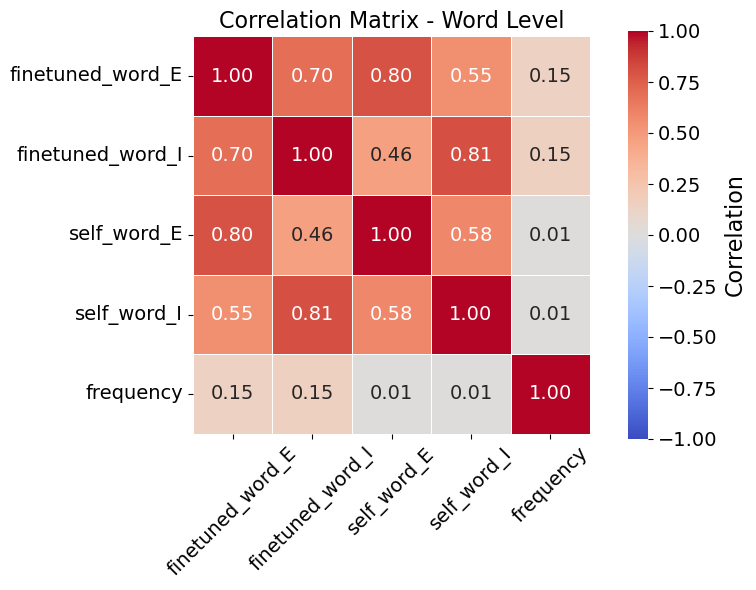

In [31]:

fig, ax = plt.subplots(figsize=(10, 6))
corr = word_freq_df[['finetuned_word_E', 'finetuned_word_I', 'self_word_E', 'self_word_I', 'frequency']].corr()

# color scale
global_min = min(corr.min())
global_max = max(corr.max())
max_abs = max(abs(global_min), abs(global_max))

# Draw heatmaps without individual colorbars
heatmaps = []
sns.heatmap(corr,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        center=0,
        vmin=-max_abs, vmax=max_abs,
        ax=ax,
        cbar=False,  # Suppress individual colorbars
        square=True,
        linewidths=0.5,
        annot_kws={"size": 14}
    )
ax.set_title(f"Correlation Matrix - Word Level", fontsize=16)
ax.tick_params(axis='x', rotation=45, labelsize=14)
ax.tick_params(axis='y', rotation=0, labelsize=14)


# Match height and align with the heatmaps
cbar_ax = fig.add_axes([0.7, 0.26, 0.02, 0.68])  # left, bottom, width, height

# Create scalar mappable with no edge
norm = plt.Normalize(vmin=-max_abs, vmax=max_abs)
sm = cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])

# Plot the colorbar without the box edge
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Correlation", fontsize=16)
cbar.ax.tick_params(labelsize=14)
cbar.outline.set_visible(False) 

plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave space for colorbar
plt.savefig("output/CorrelationMatrix_WordLevel.pdf")
plt.show()

In [7]:
import pingouin as pg

# This returns r, p-value, n, CI, and more
corr_stats_1 = pg.corr(word_freq_df['finetuned_word_E'], word_freq_df['frequency'])
print(corr_stats_1)

corr_stats_2 = pg.corr(word_freq_df['finetuned_word_E'], word_freq_df['finetuned_word_I'])
print(corr_stats_2)

corr_stats_3 = pg.corr(word_freq_df['finetuned_word_I'], word_freq_df['frequency'])
print(corr_stats_3)

corr_stats_6 = pg.corr(word_freq_df['self_word_E'], word_freq_df['self_word_I'])
print(corr_stats_6)

             n         r         CI95%  p-val BF10  power
pearson  70449  0.146362  [0.14, 0.15]    0.0  inf    1.0
             n         r        CI95%  p-val BF10  power
pearson  70449  0.695054  [0.69, 0.7]    0.0  inf    1.0
             n         r         CI95%  p-val BF10  power
pearson  70449  0.152059  [0.14, 0.16]    0.0  inf    1.0
             n         r         CI95%  p-val BF10  power
pearson  70449  0.583397  [0.58, 0.59]    0.0  inf    1.0


In [8]:
corr_stats_4 = pg.corr(word_freq_df['finetuned_word_E'], word_freq_df['self_word_E'])
print(corr_stats_4)

corr_stats_5 = pg.corr(word_freq_df['finetuned_word_I'], word_freq_df['self_word_I'])
print(corr_stats_5)

#corr_stats_6 = pg.corr(word_freq_df['finetuned_word_I'], word_freq_df['frequency'])
#print(corr_stats_6)


             n         r       CI95%  p-val BF10  power
pearson  70449  0.798436  [0.8, 0.8]    0.0  inf    1.0
             n         r         CI95%  p-val BF10  power
pearson  70449  0.811614  [0.81, 0.81]    0.0  inf    1.0


***
**Interpretation**

* frequency
    * moderate correlation with finetuned (0.14)
    * low correlation with self (0.01 - 0.03)

* per model: E and I score are correlated highly (0.72 and 0.62)
* self_word_I is moderately correlated with finetuned E and I (0.24)
* $\to$ not the E score
***

# **Distribution of raw scores (histograms)**

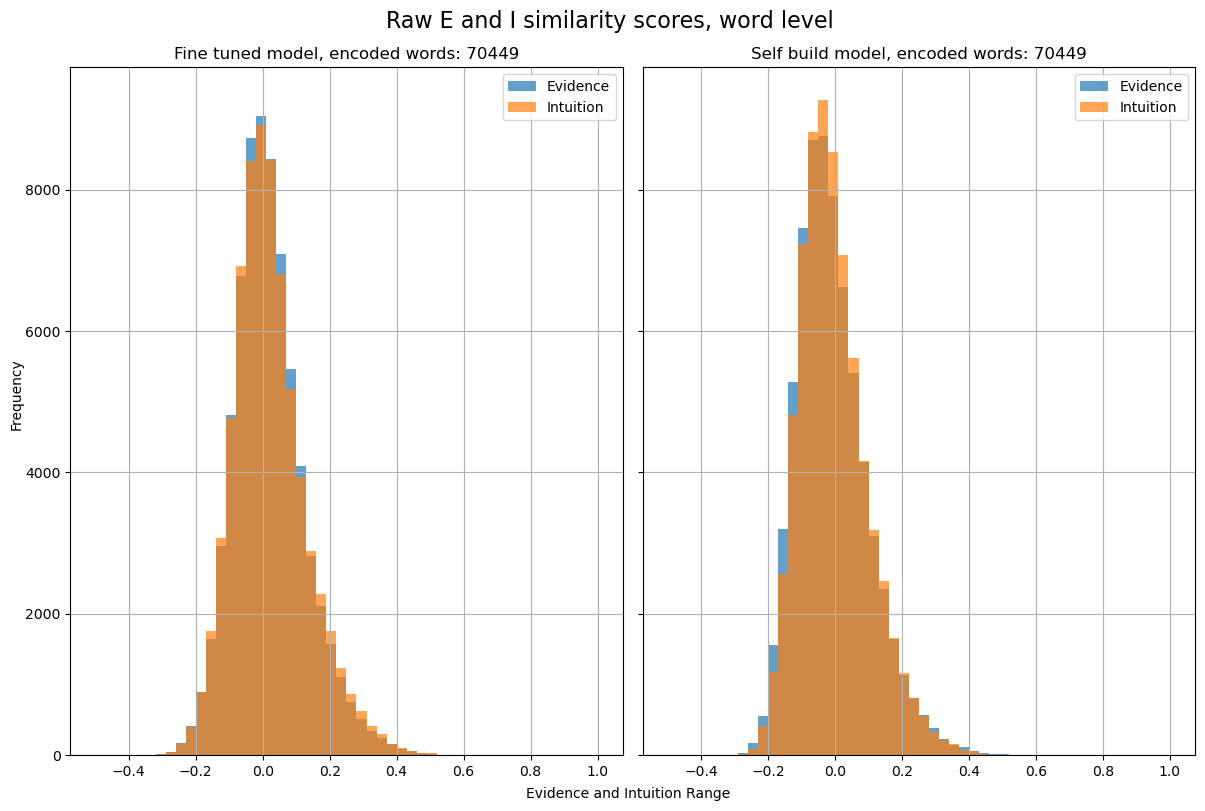

In [36]:
def plot_word_EMI_histograms(data_ft, data_self, bins = 50, x_range_base = (-0.5, 1), x_range_finetuned = (-0.5, 1), share_x = False, title = "undefined"):

    # Create a 1-column, 3-row grid for the subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=share_x, sharey = True)
    fig.suptitle(title, fontsize=16)

    #color = {"top_10": "#2CA02C", "intuition_keyword": "#FF7F0E", "evidence_keyword": "#1F77B4"} 


    axes[0].hist(data_ft['finetuned_word_E'], bins=bins, range=x_range_finetuned, alpha=0.7, label='Evidence', color='#1F77B4')
    axes[0].hist(data_ft['finetuned_word_I'], bins=bins, range=x_range_finetuned, alpha=0.7, label='Intuition', color='#FF7F0E')
    axes[0].set_title(f'Fine tuned model, encoded words: {len(data_ft)}')
    axes[0].legend(loc='upper right')
    axes[0].grid(True)

    axes[1].hist(data_self['self_word_E'], bins=bins, range=x_range_finetuned, alpha=0.7, label='Evidence', color='#1F77B4')
    axes[1].hist(data_self['self_word_I'], bins=bins, range=x_range_finetuned, alpha=0.7, label='Intuition', color='#FF7F0E')
    axes[1].set_title(f'Self build model, encoded words: {len(data_self)}')
    axes[1].legend(loc='upper right')
    axes[1].grid(True)
        
    

    # Set common labels
    fig.text(0.0, 0.5, 'Frequency', va='center', rotation='vertical')
    fig.text(0.43, 0.0, 'Evidence and Intuition Range', va='center', rotation='horizontal')

    # Adjust layout for better appearance
    plt.tight_layout()

    # Display the plot
    plt.show()


plot_word_EMI_histograms(data_ft = filtered_df_finetuned, data_self = filtered_df_self,
                         share_x = True, title = "Raw E and I similarity scores, word level")



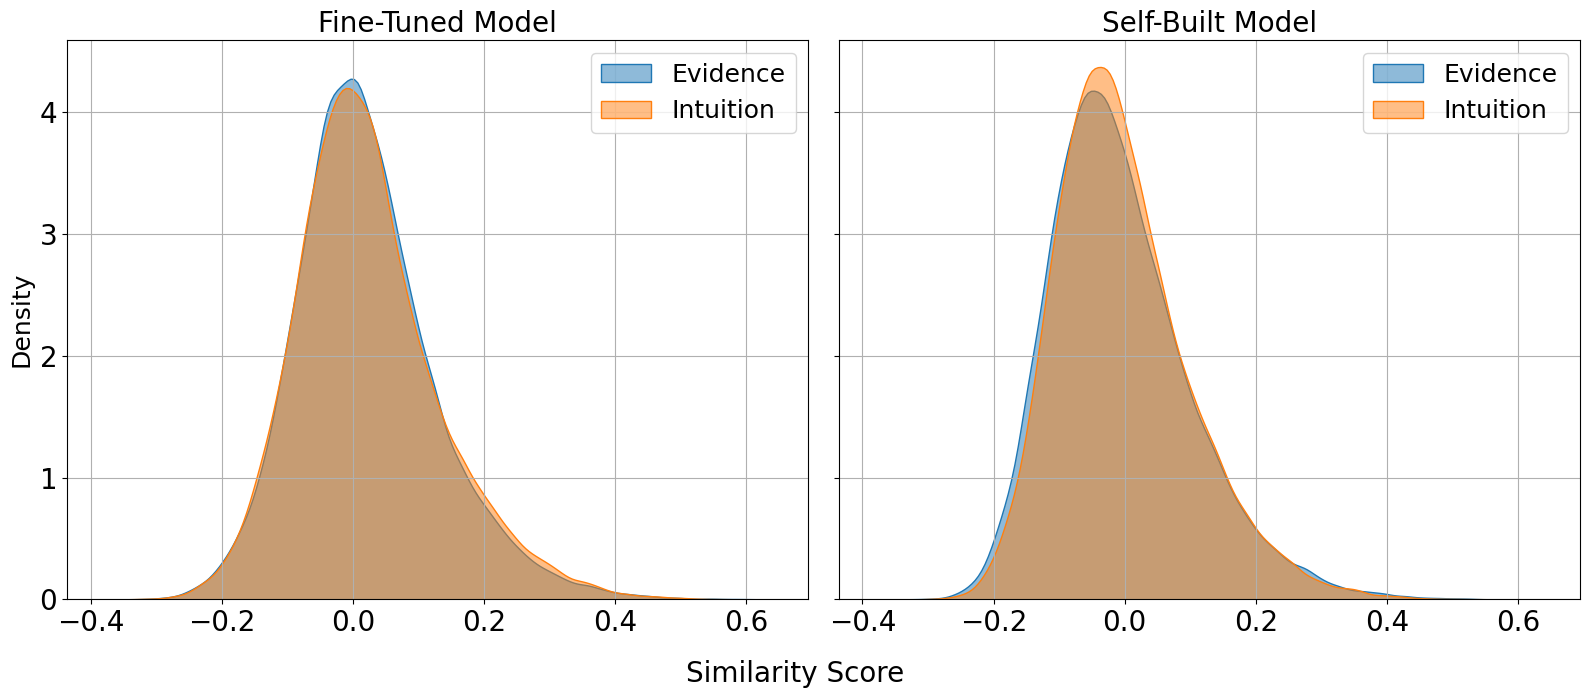

In [13]:
import seaborn as sns

def plot_word_EMI_kde(data_ft, data_self, x_range=(-0.5, 1), title="undefined"):

    fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)
    #fig.suptitle(title, fontsize=16)

    # Finetuned
    sns.kdeplot(data_ft['finetuned_word_E'].dropna(), ax=axes[0], label='Evidence', fill = True, color='#1F77B4', alpha = 0.5)
    sns.kdeplot(data_ft['finetuned_word_I'].dropna(), ax=axes[0], label='Intuition', fill = True, color='#FF7F0E', alpha = 0.5)
    axes[0].set_title(f'Fine-Tuned Model', fontsize = 20)
    axes[0].legend(fontsize=18)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("Density", fontsize = 18)
    axes[0].tick_params(axis='x', rotation=0, labelsize=20)
    axes[0].tick_params(axis='y', rotation=0, labelsize=20)

    axes[0].grid(True)

    # Self
    sns.kdeplot(data_self['self_word_E'].dropna(), ax=axes[1], label='Evidence', fill = True, color='#1F77B4', alpha = 0.5)
    sns.kdeplot(data_self['self_word_I'].dropna(), ax=axes[1], label='Intuition', fill = True, color='#FF7F0E', alpha = 0.5)
    axes[1].set_title(f'Self-Built Model', fontsize = 20)
    axes[1].legend(fontsize=18)
    axes[1].set_xlabel("")
    axes[1].grid(True)
    axes[1].tick_params(axis='x', rotation=0, labelsize=20)
    axes[1].tick_params(axis='y', rotation=0, labelsize=20)


    fig.supxlabel('Similarity Score', fontsize=20)

    plt.tight_layout()
    plt.savefig("output/Distribution_E_I_Scores_Word.pdf")
    plt.show()

plot_word_EMI_kde(data_ft = filtered_df_finetuned, data_self = filtered_df_self, title = "Raw E and I Similarity Scores - Word Level")



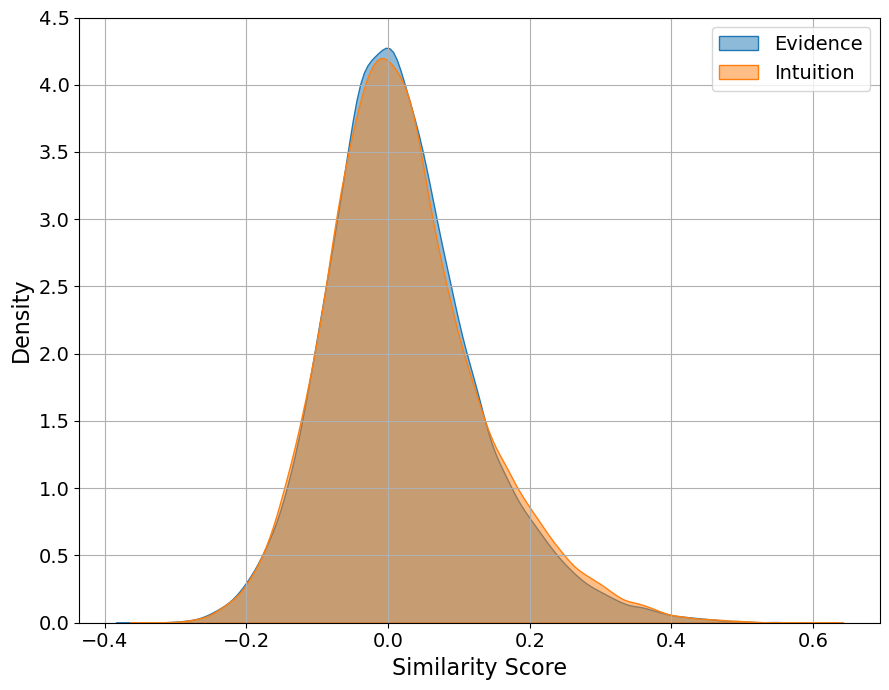

In [15]:
def plot_word_EMI_kde_finetuned_only(data_ft, x_range=(-0.5, 1), title=""):

    fig, ax = plt.subplots(figsize=(9, 7))

    sns.kdeplot(data_ft['finetuned_word_E'].dropna(), ax=ax, label='Evidence', fill=True, color='#1F77B4', alpha = 0.5)
    sns.kdeplot(data_ft['finetuned_word_I'].dropna(), ax=ax, label='Intuition', fill=True, color='#FF7F0E', alpha = 0.5)

    #ax.set_title(title, fontsize=18)
    ax.set_ylim(0, 4.5)
    ax.set_xlabel("Similarity Score", fontsize=16)
    ax.set_ylabel("Density", fontsize=16)
    ax.tick_params(axis='x', rotation=0, labelsize=14)
    ax.tick_params(axis='y', rotation=0, labelsize=14)
    ax.legend(fontsize=14)
    ax.grid(True)

    plt.tight_layout()
    plt.savefig("output/Distribution_E_I_Scores_Word_FinetunedOnly.pdf")
    plt.show()

# Call it:
plot_word_EMI_kde_finetuned_only(data_ft=filtered_df_finetuned)

***
**Interpretation:**

* Conatains only encoded words per model $\to$ no peaks at zero anymore

* Finetuned
    * wider, right skewed
    * more variation in the similarity scores
* Self build
    * normal distribution
    * value range more narrow (-0.2 to 0.2)
***

# **Scatter Plots of Raw Scores**

## **Most frequent words annotated**

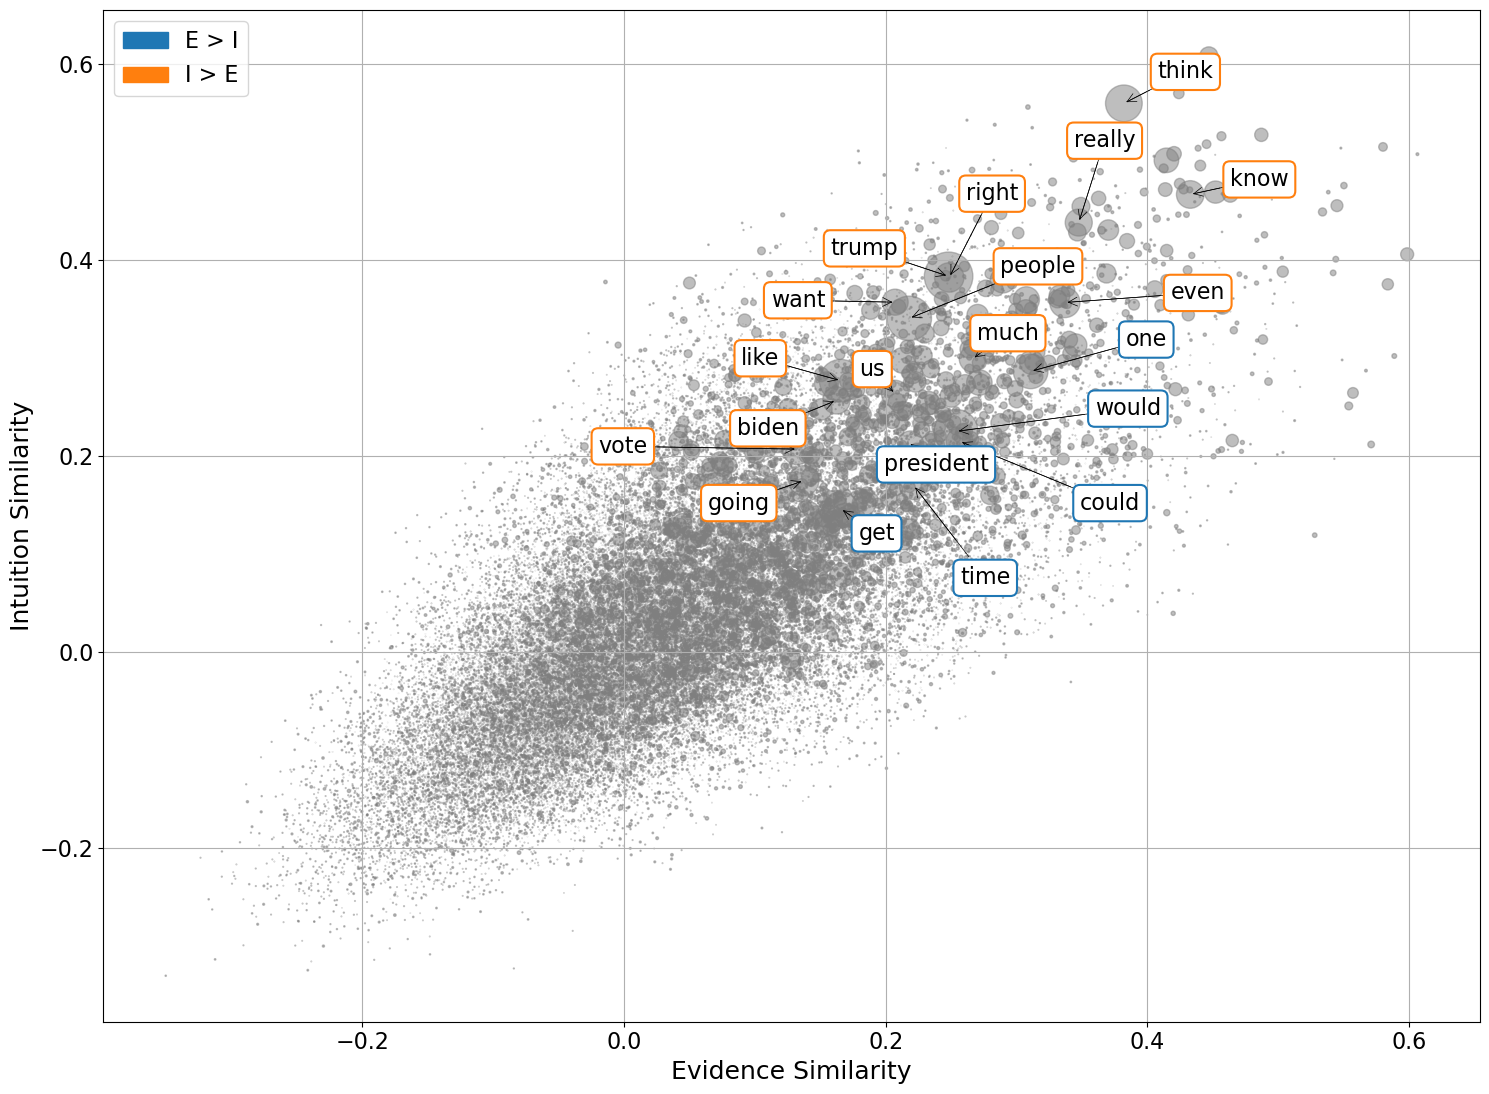

In [16]:
fig1, ax1 = plt.subplots(figsize=(15, 12))
#fig1.suptitle("Scatterplot of Raw E and I Similarity Scores\n(20 Most Frequent Corpus Words Annotated)", fontsize=22)

# Legend patches
E_patch = patches.Patch(color='#1F77B4', label='E > I')
I_patch = patches.Patch(color='#FF7F0E', label='I > E')

# Main scatterplot
ax1.scatter(filtered_df_finetuned['finetuned_word_E'],
            filtered_df_finetuned['finetuned_word_I'],
            s=filtered_df_finetuned['frequency'] / 1000,
            color='#7F7F7F', alpha=0.5)

# Axes titles and labels
ax1.set_xlabel("Evidence Similarity", fontsize=18)
ax1.set_ylabel("Intuition Similarity", fontsize=18)
#ax1.set_title("Fine-Tuned Model", fontsize=20, pad=15)
ax1.tick_params(axis='both', labelsize=16)
ax1.grid(True)

# Annotate 20 most frequent words
texts_1 = []
for i in range(20):
    word = filtered_df_finetuned['word'][i]
    x = filtered_df_finetuned['finetuned_word_E'][i]
    y = filtered_df_finetuned['finetuned_word_I'][i]
    color = "#1F77B4" if x > y else "#FF7F0E"
    texts_1.append(ax1.annotate(
        word,
        (x, y),
        fontsize=16,
        color="black",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

# Adjust text to avoid overlap
adjust_text(
    texts_1, ax=ax1, expand=(2.0, 2.0), force_text=(3.5, 3.5),
    arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
)

# Legend
ax1.legend(handles=[E_patch, I_patch], loc='upper left', fontsize=16)

# Final layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("output/Word_Scatter_20frequent_finetuned.pdf")
plt.savefig("output/Word_Scatter_20frequent_finetuned.png", bbox_inches='tight', dpi = 300)
plt.show()

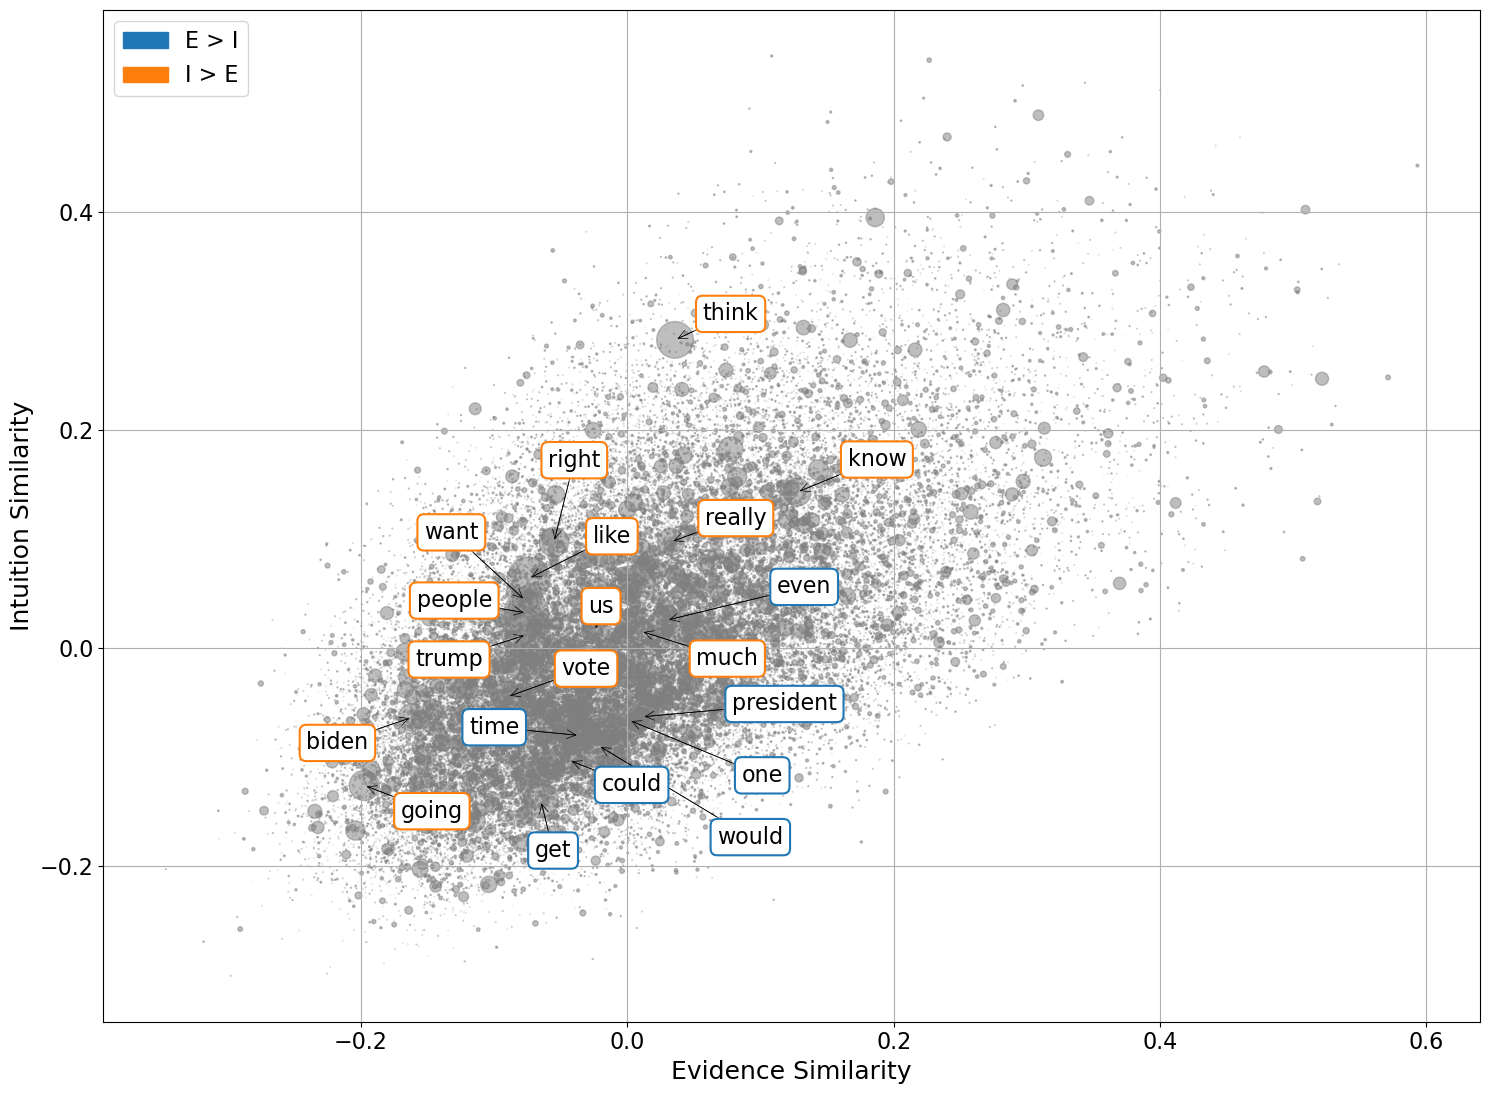

In [15]:
# Legend patches (reused or redefined here for independence)
E_patch = patches.Patch(color='#1F77B4', label='E > I')
I_patch = patches.Patch(color='#FF7F0E', label='I > E')

# Self-built model scatterplot
fig2, ax2 = plt.subplots(figsize=(15, 12))
#fig2.suptitle("Scatterplot of Raw E and I Similarity Scores\n(20 Most Frequent Corpus Words Annotated)", fontsize=22)

# Scatterplot
ax2.scatter(filtered_df_self['self_word_E'],
            filtered_df_self['self_word_I'],
            s=filtered_df_self['frequency'] / 1000,
            color='#7F7F7F', alpha=0.5)

# Axes titles and labels
ax2.set_xlabel("Evidence Similarity", fontsize=18)
ax2.set_ylabel("Intuition Similarity", fontsize=18)
#ax2.set_title("Self-Built Model", fontsize=20, pad=15)
ax2.tick_params(axis='both', labelsize=16)
ax2.grid(True)

# Annotate 20 most frequent words
texts_2 = []
for i in range(20):
    word = filtered_df_self['word'][i]
    x = filtered_df_self['self_word_E'][i]
    y = filtered_df_self['self_word_I'][i]
    color = "#1F77B4" if x > y else "#FF7F0E"
    texts_2.append(ax2.annotate(
        word,
        (x, y),
        fontsize=16,
        color="black",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

# Adjust annotations to avoid overlap
adjust_text(
    texts_2, ax=ax2, expand=(2.0, 2.0), force_text=(3.5, 3.5),
    arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
)

# Legend
ax2.legend(handles=[E_patch, I_patch], loc='upper left', fontsize=16)

# Final layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("output/Word_Scatter_20frequent_self.pdf")
plt.savefig("output/Word_Scatter_20frequent_self.png", bbox_inches='tight', dpi = 300)
plt.show()

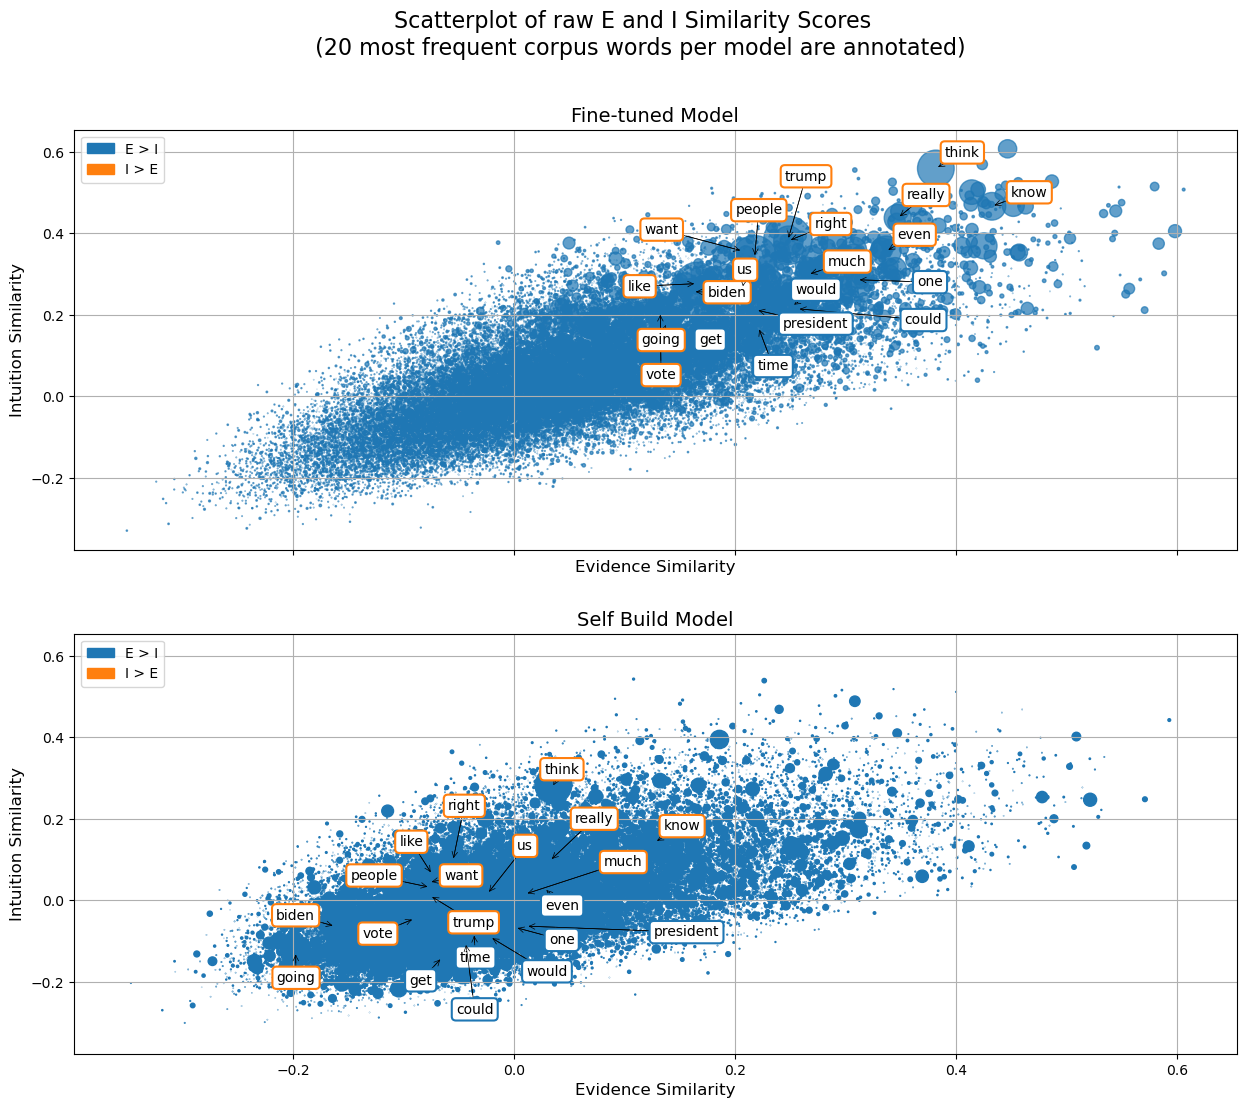

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True, sharey = True)
fig.suptitle("Scatterplot of raw E and I Similarity Scores \n (20 most frequent corpus words per model are annotated)", fontsize=16)

E_patch = patches.Patch(color='#1F77B4', label=f'E > I')
I_patch = patches.Patch(color='#FF7F0E', label=f'I > E')


axes[0].scatter(filtered_df_finetuned['finetuned_word_E'], filtered_df_finetuned['finetuned_word_I'], s = filtered_df_finetuned['frequency']/1000, color='#1F77B4', alpha = 0.7)
axes[0].set_xlabel("Evidence Similarity", fontsize = 12)
axes[0].set_ylabel('Intuition Similarity', fontsize = 12)

texts_1 = []
for i in range(20):
    color = "#1F77B4" if filtered_df_finetuned['finetuned_word_E'][i] > filtered_df_finetuned['finetuned_word_I'][i] else "#FF7F0E"
    texts_1.append(axes[0].annotate(
        filtered_df_finetuned['word'][i],
        (filtered_df_finetuned['finetuned_word_E'][i], filtered_df_finetuned['finetuned_word_I'][i]), 
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))



adjust_text(texts_1, ax=axes[0], expand=(2.0, 2.0), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))

# Add the legend
axes[0].legend(handles=[E_patch, I_patch], loc='upper left')
axes[0].set_title("Fine-tuned Model", fontsize = 14)
axes[0].grid(True)






axes[1].scatter(filtered_df_self['self_word_E'], filtered_df_self['self_word_I'], s = filtered_df_self['frequency']/1000, color='#1F77B4')
axes[1].set_xlabel("Evidence Similarity", fontsize = 12)
axes[1].set_ylabel('Intuition Similarity', fontsize = 12)

texts_2 = []
for i in range(20):
    color = "#1F77B4" if filtered_df_self['self_word_E'][i] > filtered_df_self['self_word_I'][i] else "#FF7F0E"
    texts_2.append(axes[1].annotate(
        filtered_df_self['word'][i],
        (filtered_df_self['self_word_E'][i], filtered_df_self['self_word_I'][i]), 
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))



adjust_text(texts_2, ax=axes[1], expand=(2.0, 2.0), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))

# Add the legend
axes[1].legend(handles=[E_patch, I_patch], loc='upper left')
axes[1].set_title("Self Build Model", fontsize = 14)
axes[1].grid(True)


plt.savefig("output/Word_Scatter_20frequent.pdf")
plt.savefig("output/Word_Scatter_20frequent.jpg")

**Plot Details**

* Only plotted words, whose encoding is not all zeros (only words present in the model)
* Annotated the 15 most frequent corpus words, which are present in the model
   
* Striking: finetuned model: most frequent words are mostly I > E similar

In [37]:
print(filtered_df_finetuned['word'][:15]) 

filtered_df_self['word'][:15] == filtered_df_finetuned['word'][:15] 

0      trump
1     people
2      would
3       like
4      think
5        get
6        one
7       vote
8       even
9      going
10     right
11      time
12      know
13     biden
14    really
Name: word, dtype: object


0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
Name: word, dtype: bool

## **Words with highest and lowest similarity annotated**

In [38]:
filtered_df_self

word  frequency  len  \
0           trump    1220659    5   
1          people    1028121    6   
2           would    1003710    5   
3            like     943124    4   
4           think     697822    5   
...           ...        ...  ...   
70444    westeast         10    8   
70445    lofgrens         10    8   
70446    whirring         10    8   
70447  classicals         10   10   
70448       coyne         10    5   

                                    self_word_embeddings  self_word_I  \
0      [0.06490105, -0.030755918, 0.07042432, 0.04734...     0.011930   
1      [-0.054518852, -0.008642221, -0.00013800293, -...     0.032023   
2      [-0.07406097, -0.03809616, 0.070128635, 0.0118...    -0.089805   
3      [-0.07020836, -0.017374355, -0.09395944, 0.065...     0.063724   
4      [0.0047624307, -0.04358237, -0.06306772, 0.047...     0.282668   
...                                                  ...          ...   
70444  [-0.030138947, -0.06995637, -0.021085188, 0.00...    -0.159861   
70445  [-0.00041436727, 0.031691, 0.001026782, 0.0095...    -0.041946   
70446  [0.03879461, -0.010755048, 0.044968367, 0.1001...     0.043625   
70447  [-0.012721898, -0.108203694, -0.027846154, -0....     0.077077   
70448  [0.04587843, -0.061493903, 0.034979586, -0.075...    -0.048543   

       self_word_E  
0        -0.075950  
1        -0.075853  
2        -0.021537  
3        -0.073947  
4         0.035809  
...            ...  
70444    -0.157467  
70445     0.065054  
70446     0.001492  
70447     0.093413  
70448     0.042333  

[70449 rows x 6 columns]

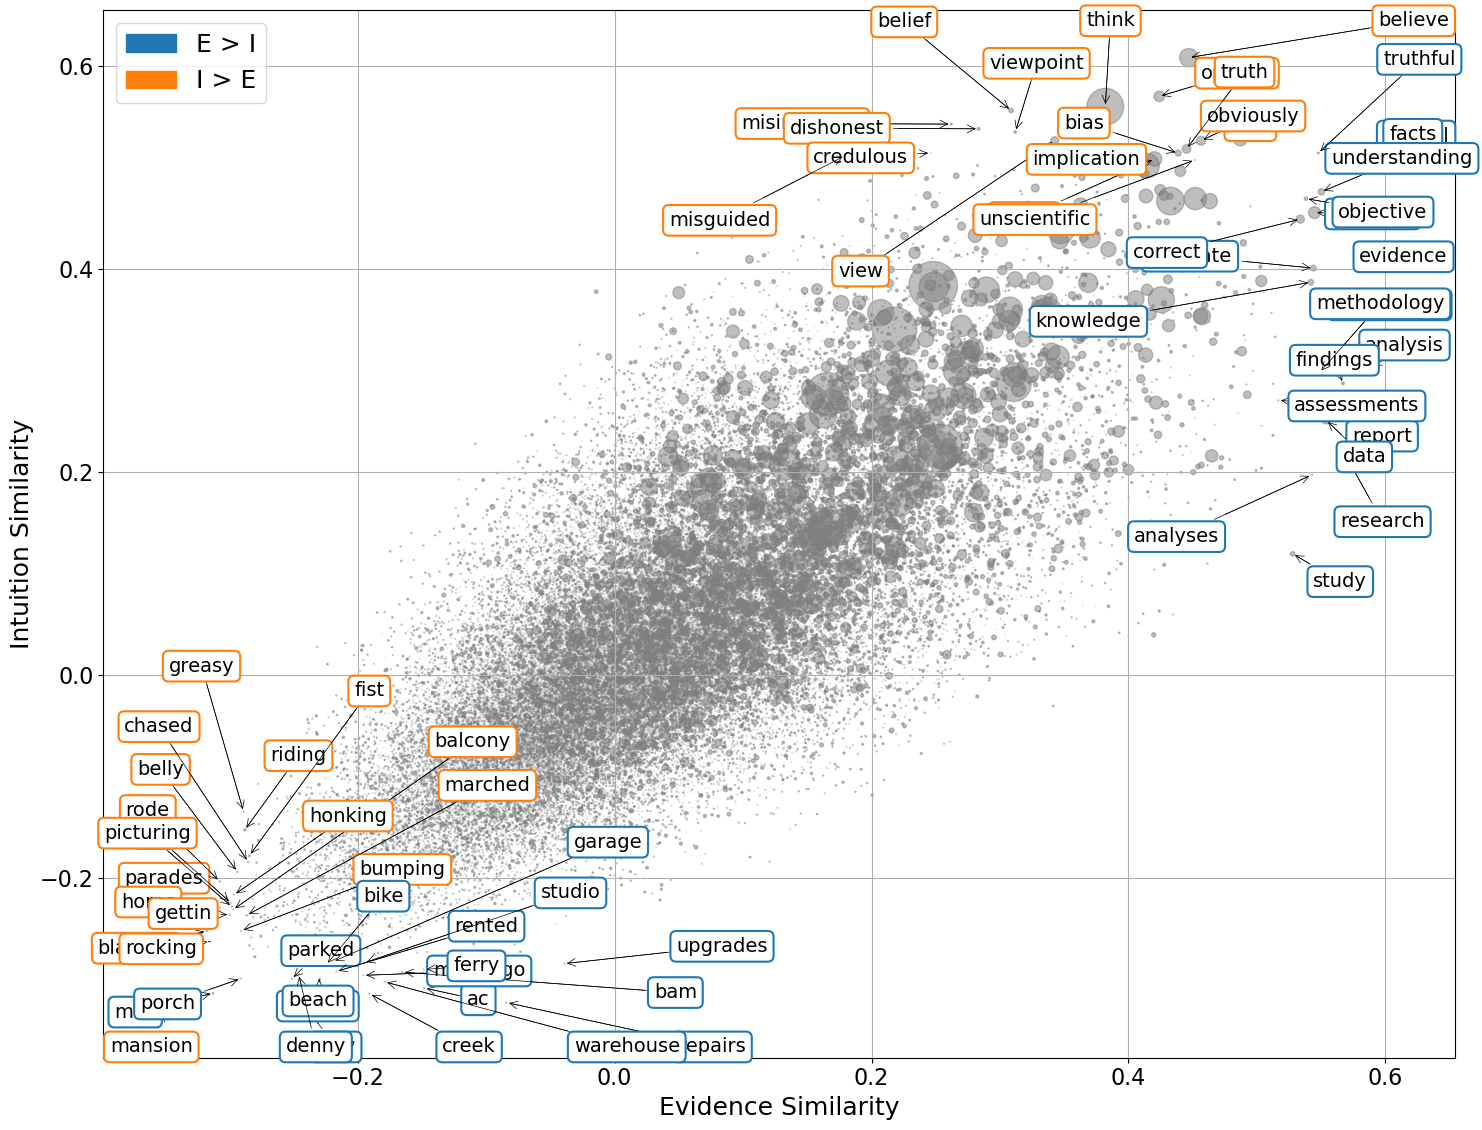

In [20]:
# Font sizes
label_fontsize = 18
tick_fontsize = 16
title_fontsize = 18
facet_title_fontsize = 16

# Top/bottom nr of words to annotate
x = 20

fig, ax = plt.subplots(figsize=(15, 12))

# Legend patches
E_patch = patches.Patch(color='#1F77B4', label=f'E > I')
I_patch = patches.Patch(color='#FF7F0E', label=f'I > E')


def get_top_bottom_words(df, x, col_x, col_y):
    top_x = df.nlargest(x, col_x)  
    bottom_x = df.nsmallest(x, col_x) 
    top_y = df.nlargest(x, col_y)  
    bottom_y = df.nsmallest(x, col_y) 
    return pd.concat([top_x, bottom_x, top_y, bottom_y]).drop_duplicates(subset="word")


# --- Plot: Fine-tuned Model ---
selected_words_1 = get_top_bottom_words(filtered_df_finetuned, x, 'finetuned_word_E', 'finetuned_word_I')

# Scatter plot
ax.scatter(
    filtered_df_finetuned['finetuned_word_E'],
    filtered_df_finetuned['finetuned_word_I'],
    s=filtered_df_finetuned['frequency'] / 1000,
    color='#7F7F7F', alpha=0.5
)

# Axis labels
ax.set_xlabel("Evidence Similarity", fontsize=label_fontsize)
ax.set_ylabel("Intuition Similarity", fontsize=label_fontsize)

# Ticks
ax.tick_params(axis='both', labelsize=tick_fontsize)

# Annotations
texts_1 = []
for _, row in selected_words_1.iterrows():
    color = "#1F77B4" if row['finetuned_word_E'] > row['finetuned_word_I'] else "#FF7F0E"
    texts_1.append(ax.annotate(
        row['word'],
        (row['finetuned_word_E'], row['finetuned_word_I']),
        fontsize=14,
        color="black",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(
    texts_1,
    ax=ax,
    expand=(2, 2),
    force_text=(3.5, 3.5),
    arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
)

# Title
#ax.set_title("Fine-Tuned Model", fontsize=title_fontsize)

# Legend
ax.legend(handles=[E_patch, I_patch], loc='upper left', fontsize=label_fontsize)

ax.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("output/Word_Scatter_TopBottom20_finetuned.pdf")
plt.savefig("output/Word_Scatter_TopBottom20_finetuned.png", bbox_inches='tight', dpi = 300)
plt.show()

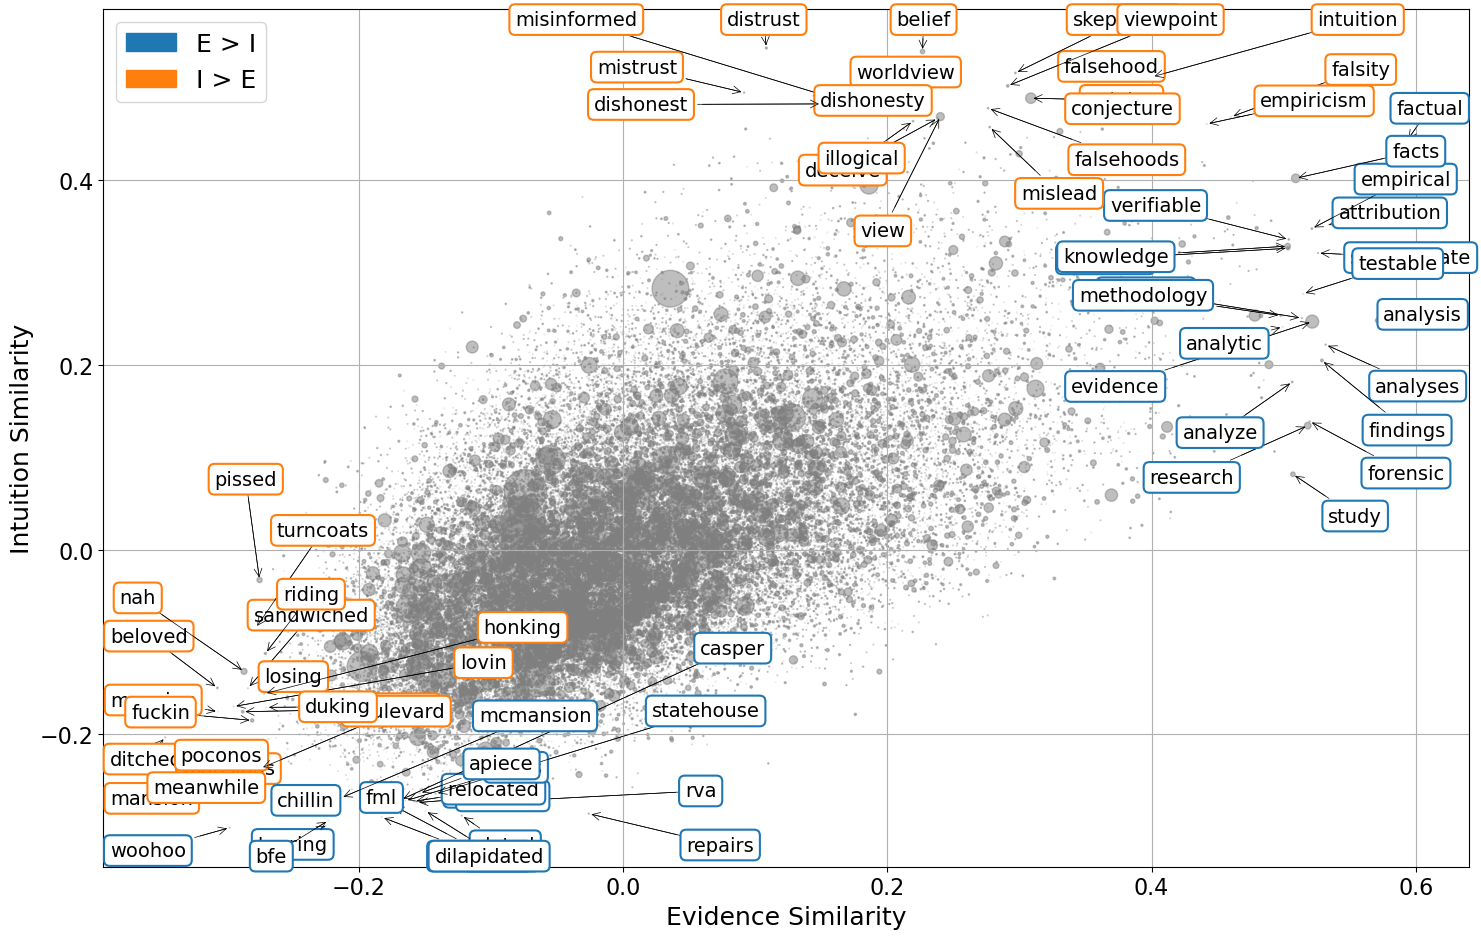

In [18]:
# Font sizes
label_fontsize = 18
tick_fontsize = 16
title_fontsize = 18
facet_title_fontsize = 16

# Top/bottom nr of words to annotate
x = 20

# Figure setup
fig, ax = plt.subplots(figsize=(15, 10))

# Legend patches
E_patch = patches.Patch(color='#1F77B4', label='E > I')
I_patch = patches.Patch(color='#FF7F0E', label='I > E')

# --- Plot: Self-built Model ---
selected_words_2 = get_top_bottom_words(filtered_df_self, x, 'self_word_E', 'self_word_I')

# Scatter plot
ax.scatter(
    filtered_df_self['self_word_E'],
    filtered_df_self['self_word_I'],
    s=filtered_df_self['frequency'] / 1000,
    color='#7F7F7F', alpha=0.5
)

# Axis labels
ax.set_xlabel("Evidence Similarity", fontsize=label_fontsize)
ax.set_ylabel("Intuition Similarity", fontsize=label_fontsize)

# Ticks
ax.tick_params(axis='both', labelsize=tick_fontsize)

# Annotations
texts_2 = []
for _, row in selected_words_2.iterrows():
    color = "#1F77B4" if row['self_word_E'] > row['self_word_I'] else "#FF7F0E"
    texts_2.append(ax.annotate(
        row['word'],
        (row['self_word_E'], row['self_word_I']),
        fontsize=14,
        color="black",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(
    texts_2, ax=ax,
    expand=(2.0, 2.0), force_text=(3.5, 3.5),
    arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
)

# Title and legend
#ax.set_title("Self-Built Model", fontsize=title_fontsize)
ax.legend(handles=[E_patch, I_patch], loc='upper left', fontsize=label_fontsize)

# Grid and layout
ax.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("output/Word_Scatter_TopBottom20_selfbuild.pdf")
plt.savefig("output/Word_Scatter_TopBottom20_selfbuild.png", bbox_inches='tight', dpi = 300)

plt.show()


### Print highest and lowest E and I similarity words

In [40]:

ft_E_des = filtered_df_finetuned.sort_values(by="finetuned_word_E", ascending=False).reset_index(drop = True)
ft_E_asc = filtered_df_finetuned.sort_values(by="finetuned_word_E", ascending=True).reset_index(drop = True)


print("Highest and Lowest Evidence Similarity")
print("--------------------------------------")
print(ft_E_des.head(10)['word']) 
print(ft_E_asc.head(10)['word']) 
print("--------------------------------------\n")


Highest and Lowest Evidence Similarity
--------------------------------------
0          factual
1         evidence
2         analysis
3      information
4            facts
5         research
6         findings
7           report
8             data
9    understanding
Name: word, dtype: object
0      mansion
1      parades
2     blasting
3      rocking
4         mall
5        horns
6         rode
7       gettin
8         tiki
9    picturing
Name: word, dtype: object
--------------------------------------



In [41]:
ft_I_des = filtered_df_finetuned.sort_values(by="finetuned_word_I", ascending=False).reset_index(drop = True)
ft_I_asc = filtered_df_finetuned.sort_values(by="finetuned_word_I", ascending=True).reset_index(drop = True)


print("Highest and Lowest Intuition Similarity")
print("--------------------------------------")
print(ft_I_des.head(10)['word']) 
print(ft_I_asc.head(10)['word']) 
print("--------------------------------------\n")


Highest and Lowest Intuition Similarity
--------------------------------------
0        believe
1        opinion
2          think
3         belief
4    misinformed
5      dishonest
6      viewpoint
7           true
8      obviously
9           view
Name: word, dtype: object
0      mansion
1         flew
2      repairs
3      touring
4        creek
5         mall
6           ac
7    warehouse
8        beach
9       parked
Name: word, dtype: object
--------------------------------------



## **Words annotated, based on threshold**

In [42]:

# Define the threshold to annotate
#threshold = 0.4
model = "finetuned"


def get_top_bottom_words(df, x, col_x, col_y):
    top_x = df.nlargest(x, col_x)  # Top x by Evidence Similarity
    bottom_x = df.nsmallest(x, col_x)  # Bottom x by Evidence Similarity
    top_y = df.nlargest(x, col_y)  # Top x by Intuition Similarity
    bottom_y = df.nsmallest(x, col_y)  # Bottom x by Intuition Similarity
    
    return pd.concat([top_x, bottom_x, top_y, bottom_y]).drop_duplicates(subset = "word")
    


def plot_annotated_scatter(data, model, threshold_E, threshold_I, x_lim, y_lim):
    plt.figure(figsize=(15, 12))
    plt.title(f"Scatter plot of E and I Similarity raw scores \n ({model} Model, Top Words Annotated)", fontsize=12)

    # Select words above the given thresholds
    selected_words = data[
        (data[f'{model}_word_E'] >= threshold_E) | 
        (data[f'{model}_word_I'] >= threshold_I)
    ].drop_duplicates(subset="word")
    
    
    plt.scatter(data[f'{model}_word_E'], data[f'{model}_word_I'], s=data['frequency'] / 1000, alpha=0.6)
    plt.xlabel("Evidence Similarity")
    plt.ylabel("Intuition Similarity")
    plt.xlim(x_lim)
    plt.ylim(y_lim)


    #color = {"top_10": "#2CA02C", "intuition_keyword": "#FF7F0E", "evidence_keyword": "#1F77B4"} 

    # annotations
    texts = []
    for _, row in selected_words.iterrows():
        color = "#1F77B4" if row[f'{model}_word_E'] > row[f'{model}_word_I'] else "#FF7F0E"
        texts.append(plt.annotate(
            row['word'], 
            (row[f'{model}_word_E'], row[f'{model}_word_I']), 
            color="black",  # Text color
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
        ))

    
    adjust_text(texts, expand=(2.0, 2.0), force_text=(3.5, 3.0),
                arrowprops=dict(arrowstyle="->", color="black", lw=0.5))
    
    # Create custom legend handles
    E_patch = patches.Patch(color='#1F77B4', label=f'E > I (Threshold: E={threshold_E}, I={threshold_I})')
    I_patch = patches.Patch(color='#FF7F0E', label=f'I > E (Threshold: E={threshold_E}, I={threshold_I})')
    
    # Add the legend
    plt.legend(handles=[E_patch, I_patch], loc='upper left')

    plt.grid(True)
    
    plt.show()


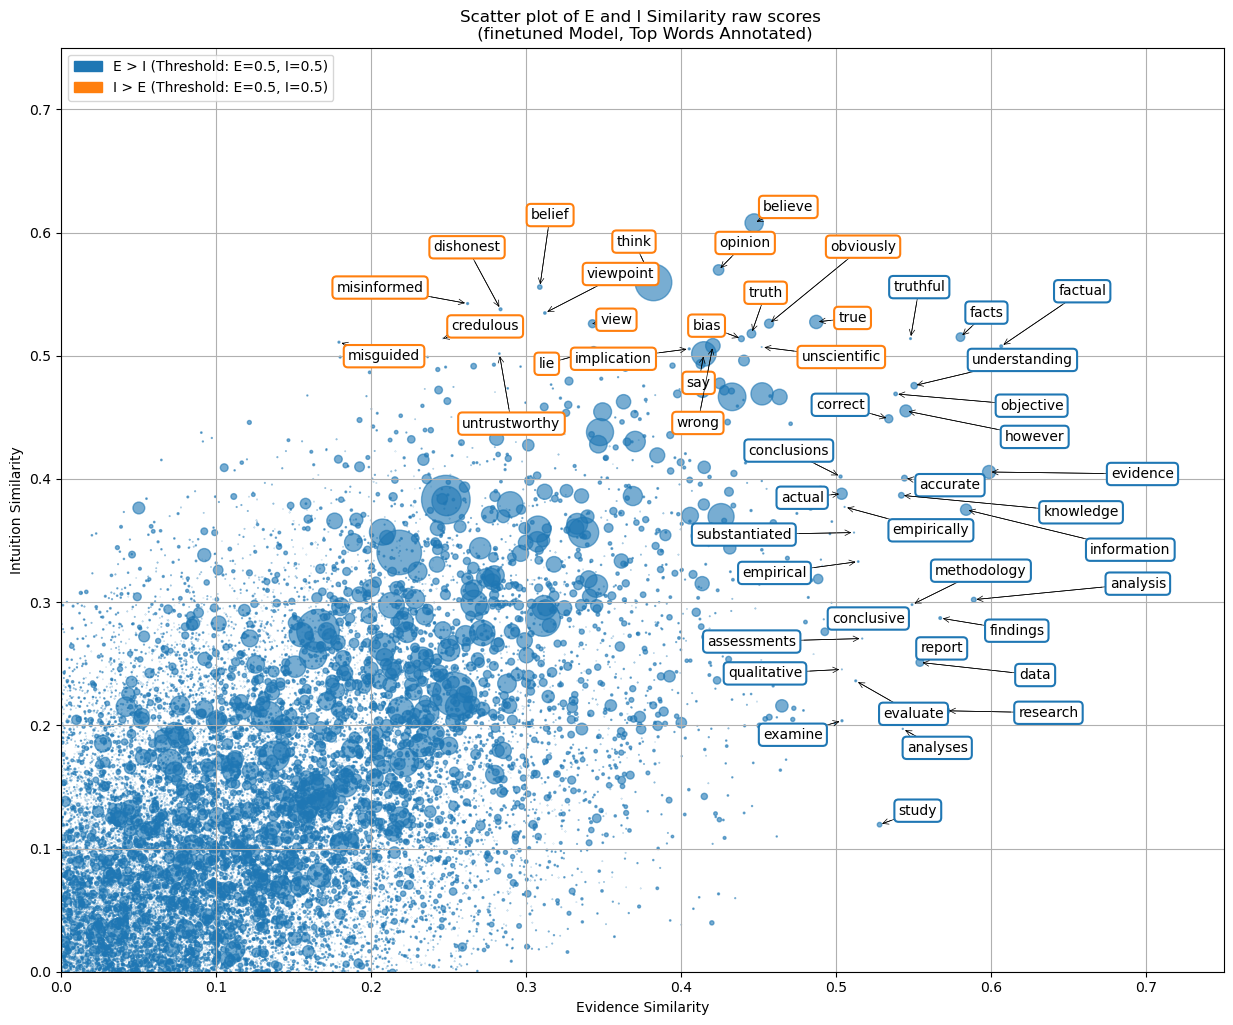

In [43]:
plot_annotated_scatter(filtered_df_finetuned, "finetuned", threshold_E = 0.5, 
                       threshold_I = 0.5, x_lim = (0.0, 0.75), y_lim = (0.0, 0.75))

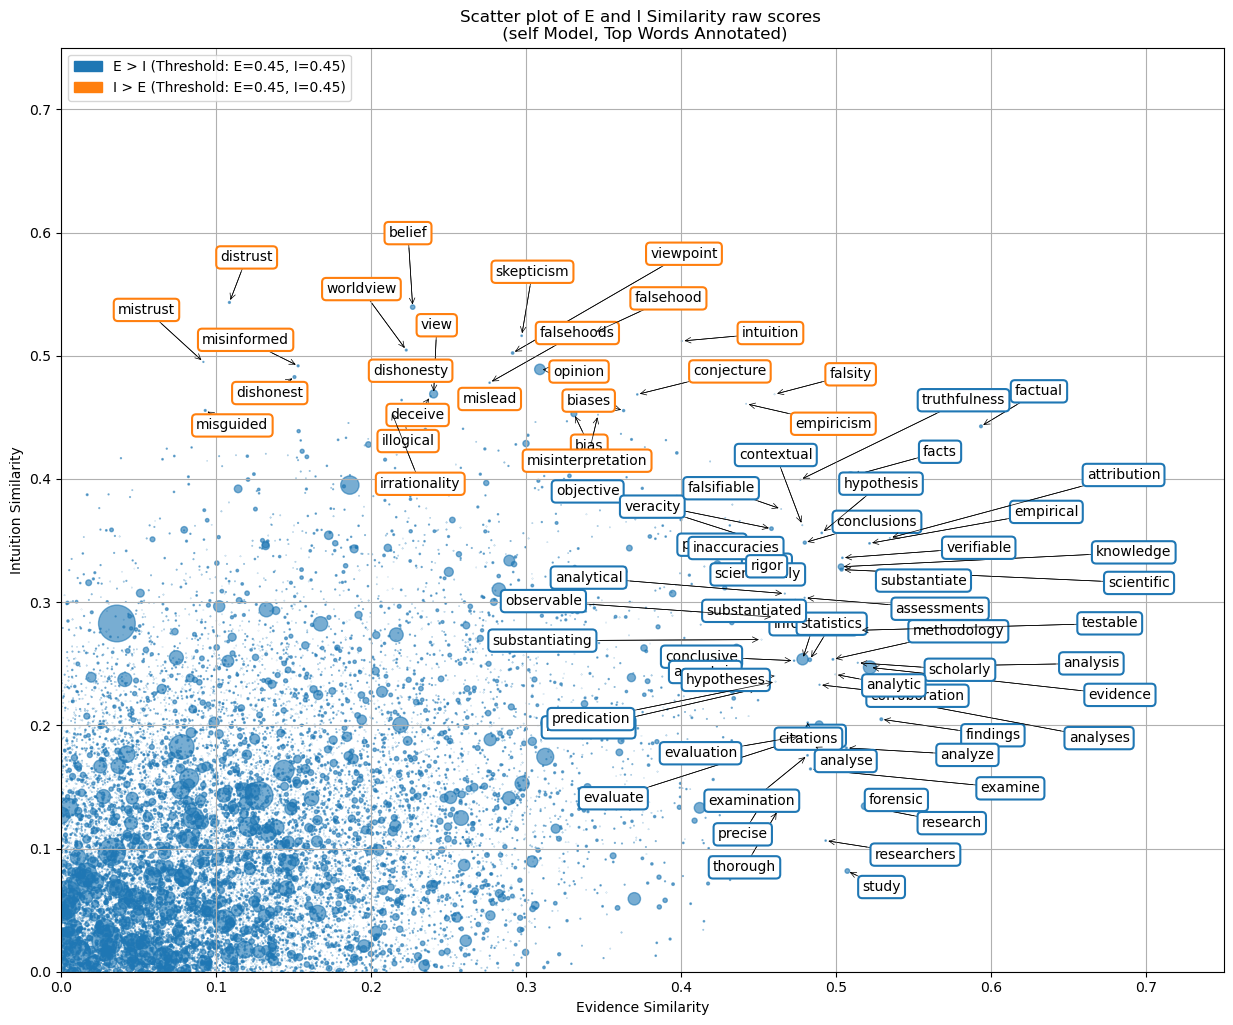

In [45]:
plot_annotated_scatter(filtered_df_self, "self", threshold_E = 0.45, threshold_I = 0.45, 
                       x_lim = (0.0, 0.75), y_lim = (0.0, 0.75))

***
***
***

## **Words annotated, based on high scores and high frequencies**

In [40]:
# extract word frequencies separately

#base_model_words = filtered_df_base[["word", "frequency", "base_word_embeddings", "base_word_E", "base_word_I"]]
finetuned_model_words = filtered_df_finetuned[["word", "frequency", "finetuned_word_embeddings", "finetuned_word_E", "finetuned_word_I"]]
self_model_words = filtered_df_self[["word", "frequency", "self_word_embeddings", "self_word_E", "self_word_I"]]

In [41]:
# compute keyness as difference of words E similairty with a words I similarity

base_model_words['EMI'] = base_model_words["base_word_E"] - base_model_words["base_word_I"] 
finetuned_model_words['EMI'] = finetuned_model_words["finetuned_word_E"] - finetuned_model_words["finetuned_word_I"] 
self_model_words['EMI'] = self_model_words["self_word_E"] - self_model_words["self_word_I"] 


# absolute kenyness
base_model_words['abs_EMI'] = abs(base_model_words['EMI'])
finetuned_model_words['abs_EMI'] = abs(finetuned_model_words['EMI'])
self_model_words['abs_EMI'] = abs(self_model_words['EMI'])

# linear frequency adjusted
base_model_words['lin_scaled_EMI'] = base_model_words['abs_EMI'] * base_model_words['frequency']
finetuned_model_words['lin_scaled_EMI'] = finetuned_model_words['abs_EMI'] * finetuned_model_words['frequency']
self_model_words['lin_scaled_EMI'] = self_model_words['abs_EMI'] * self_model_words['frequency']

# log frequency adjusted
base_model_words['log_scaled_EMI'] = base_model_words['abs_EMI'] * base_model_words['frequency'].apply(lambda x: math.log(1 + x))
finetuned_model_words['log_scaled_EMI'] = finetuned_model_words['abs_EMI'] * finetuned_model_words['frequency'].apply(lambda x: math.log(1 + x))
self_model_words['log_scaled_EMI'] = self_model_words['abs_EMI'] * self_model_words['frequency'].apply(lambda x: math.log(1 + x))


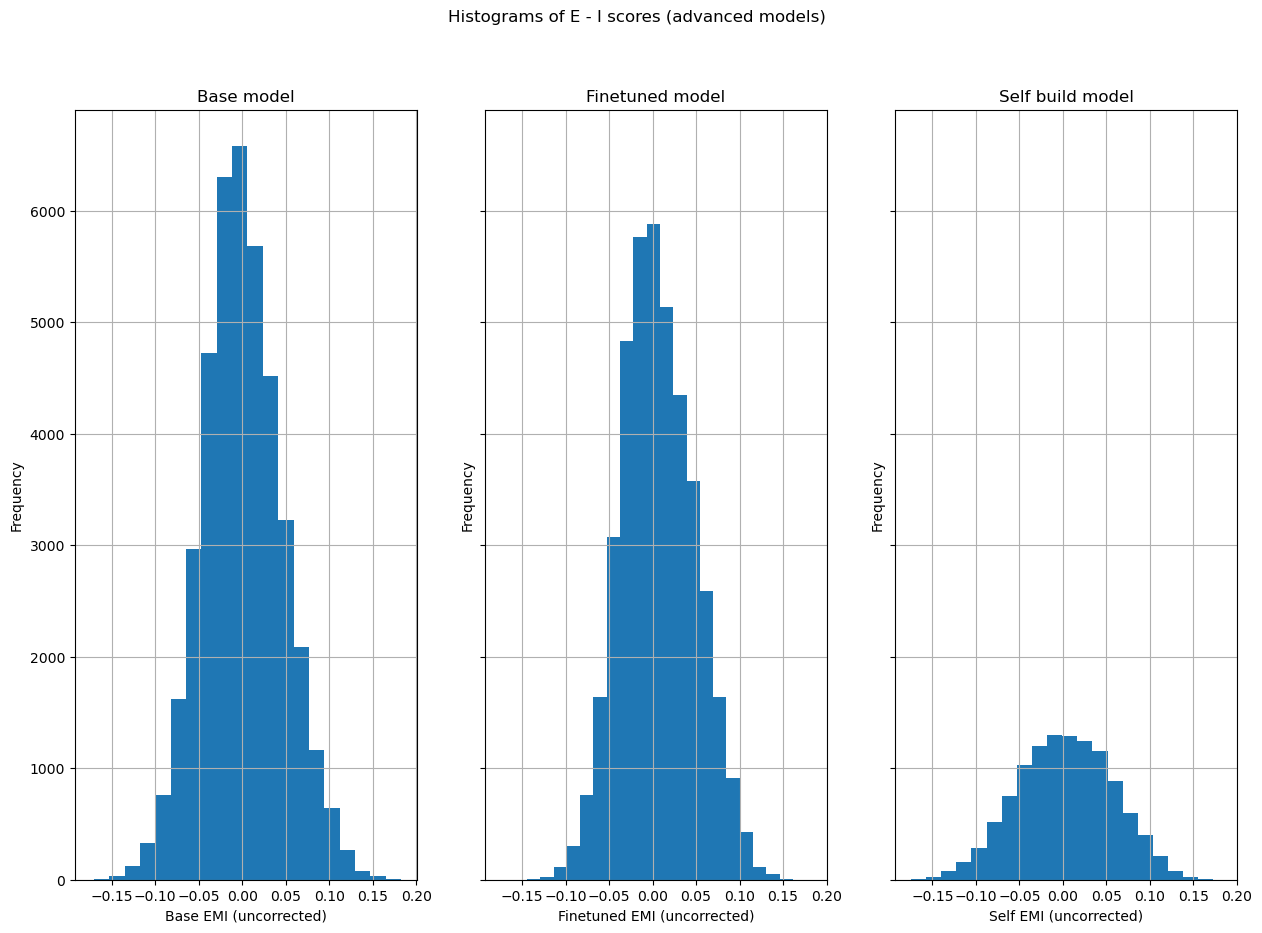

In [55]:

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharex=True, sharey = True)
fig.suptitle("Histograms of E - I scores (advanced models)", fontsize=12)

axes[0].hist(base_model_words['EMI'], bins = 20)
axes[0].set_xlabel("Base EMI (uncorrected)")
axes[0].set_ylabel('Frequency')
axes[0].set_title("Base model")
axes[0].grid(True)


axes[1].hist(finetuned_model_words['EMI'], bins = 20)
axes[1].set_xlabel("Finetuned EMI (uncorrected)")
axes[1].set_ylabel('Frequency')
axes[1].set_title("Finetuned model")
axes[1].grid(True)

axes[2].hist(self_model_words['EMI'], bins = 20)
axes[2].set_xlabel("Self EMI (uncorrected)")
axes[2].set_ylabel('Frequency')
axes[2].set_title("Self build model")
axes[2].grid(True)

In [43]:
# Filter top 10 with highest positive impact --> most influential for evidence 
# filter top 10 with highest negative impart --> filter to all negative, sort, top 10 --> most influential fr intuition

df_dict = {"base" : base_model_words, "finetuned" : finetuned_model_words, "self" : self_model_words}

def get_most_influential_words(base_model_words, finetuned_model_words, self_model_words, x):
    
    
    print("-------------------------------")
    print("Most influential for Evidence")
    
    
    # positive keyness
    base_pos_E = base_model_words[base_model_words["EMI"] > 0] 
    finetuned_pos_E = finetuned_model_words[finetuned_model_words["EMI"] > 0]
    self_pos_E = self_model_words[self_model_words["EMI"] > 0]
    
    base_pos_top_abs = pd.DataFrame(base_pos_E.sort_values(by = "abs_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "abs"})#.reset_index(drop=True, inplace=True)
    finetuned_pos_top_abs = pd.DataFrame(finetuned_pos_E.sort_values(by = "abs_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "abs"})#.reset_index(drop=True, inplace=True)
    self_pos_top_abs = pd.DataFrame(self_pos_E.sort_values(by = "abs_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "abs"})#.reset_index(drop=True, inplace=True)
    
    
    base_pos_top_lin = pd.DataFrame(base_pos_E.sort_values(by = "lin_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "lin"})#.reset_index(drop=True, inplace=True)
    finetuned_pos_top_lin = pd.DataFrame(finetuned_pos_E.sort_values(by = "lin_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "lin"})#.reset_index(drop=True, inplace=True)
    self_pos_top_lin = pd.DataFrame(self_pos_E.sort_values(by = "lin_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "lin"})#.reset_index(drop=True, inplace=True)
    
    
    base_pos_top_log = pd.DataFrame(base_pos_E.sort_values(by = "log_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "log"})#.reset_index(drop=True, inplace=True)
    finetuned_pos_top_log = pd.DataFrame(finetuned_pos_E.sort_values(by = "log_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "log"})#.reset_index(drop=True, inplace=True)
    self_pos_top_log = pd.DataFrame(self_pos_E.sort_values(by = "log_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "log"})#.reset_index(drop=True, inplace=True)

    # merge
    base_merged_pos = base_pos_top_abs.merge(base_pos_top_lin, left_index=True, right_index=True).merge(base_pos_top_log, left_index=True, right_index=True)
    finetuned_merged_pos = finetuned_pos_top_abs.merge(finetuned_pos_top_lin, left_index=True, right_index=True).merge(finetuned_pos_top_log, left_index=True, right_index=True)
    self_merged_pos = self_pos_top_abs.merge(self_pos_top_lin, left_index=True, right_index=True).merge(self_pos_top_log, left_index=True, right_index=True)
    
    # print
    print("Base Model:")
    print(base_merged_pos)
    
    print("Finetuned Model:")
    print(finetuned_merged_pos)
    
    print("Self Model:")
    print(self_merged_pos)


    print("-------------------------------")
    print("Most influential for Intuition")
    
    
    # negative keyness
    base_neg_I = base_model_words[base_model_words["EMI"] <= 0] 
    finetuned_neg_I = finetuned_model_words[finetuned_model_words["EMI"] <= 0]
    self_neg_I = self_model_words[self_model_words["EMI"] <= 0]
    
    base_neg_top_abs = pd.DataFrame(base_neg_I.sort_values(by = "abs_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "abs"})#.reset_index(drop=True, inplace=True)
    finetuned_neg_top_abs = pd.DataFrame(finetuned_neg_I.sort_values(by = "abs_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "abs"})#.reset_index(drop=True, inplace=True)
    self_neg_top_abs = pd.DataFrame(self_neg_I.sort_values(by = "abs_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "abs"})#.reset_index(drop=True, inplace=True)
    
    
    base_neg_top_lin = pd.DataFrame(base_neg_I.sort_values(by = "lin_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "lin"})#.reset_index(drop=True, inplace=True)
    finetuned_neg_top_lin = pd.DataFrame(finetuned_neg_I.sort_values(by = "lin_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "lin"})#.reset_index(drop=True, inplace=True)
    self_neg_top_lin = pd.DataFrame(self_neg_I.sort_values(by = "lin_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "lin"})#.reset_index(drop=True, inplace=True)
    
    
    base_neg_top_log = pd.DataFrame(base_neg_I.sort_values(by = "log_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "log"})#.reset_index(drop=True, inplace=True)
    finetuned_neg_top_log = pd.DataFrame(finetuned_neg_I.sort_values(by = "log_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "log"})#.reset_index(drop=True, inplace=True)
    self_neg_top_log = pd.DataFrame(self_neg_I.sort_values(by = "log_scaled_EMI", ascending = False)['word'].head(x).values).rename(columns = {0 : "log"})#.reset_index(drop=True, inplace=True)

    # merge
    base_merged_neg = base_neg_top_abs.merge(base_neg_top_lin, left_index=True, right_index=True).merge(base_neg_top_log, left_index=True, right_index=True)
    finetuned_merged_neg = finetuned_neg_top_abs.merge(finetuned_neg_top_lin, left_index=True, right_index=True).merge(finetuned_neg_top_log, left_index=True, right_index=True)
    self_merged_neg = self_neg_top_abs.merge(self_neg_top_lin, left_index=True, right_index=True).merge(self_neg_top_log, left_index=True, right_index=True)
    
    # print
    print("Base Model:")
    print(base_merged_neg)
    
    print("Finetuned Model:")
    print(finetuned_merged_neg)
    
    print("Self Model:")
    print(self_merged_neg)

    return base_merged_pos, finetuned_merged_pos, self_merged_pos, base_merged_neg, finetuned_merged_neg, self_merged_neg
    
    
    

In [44]:
base_merged_pos, finetuned_merged_pos, self_merged_pos, base_merged_neg, finetuned_merged_neg, self_merged_neg = get_most_influential_words(base_model_words, finetuned_model_words, self_model_words, 10)


-------------------------------
Most influential for Evidence
Base Model:
             abs     lin          log
0     laboratory      uk         data
1     evaluation      eu     research
2       overview    time        study
3       analyses     get      process
4           data     one  information
5       analysis   would     analysis
6  comprehensive    need     required
7        analyze    also     services
8          study   years       report
9    measurement  change      results
Finetuned Model:
             abs     lin         log
0     evaluation      eu        data
1     laboratory      uk       study
2       detailed   would    research
3       overview    like    analysis
4       analyses  people         new
5  comprehensive     get    required
6       analysis  brexit     provide
7    engineering     one     process
8        analyze    deal   available
9      completed    time  production
Self Model:
         abs      lin          log
0   capacity  climate        study
1 

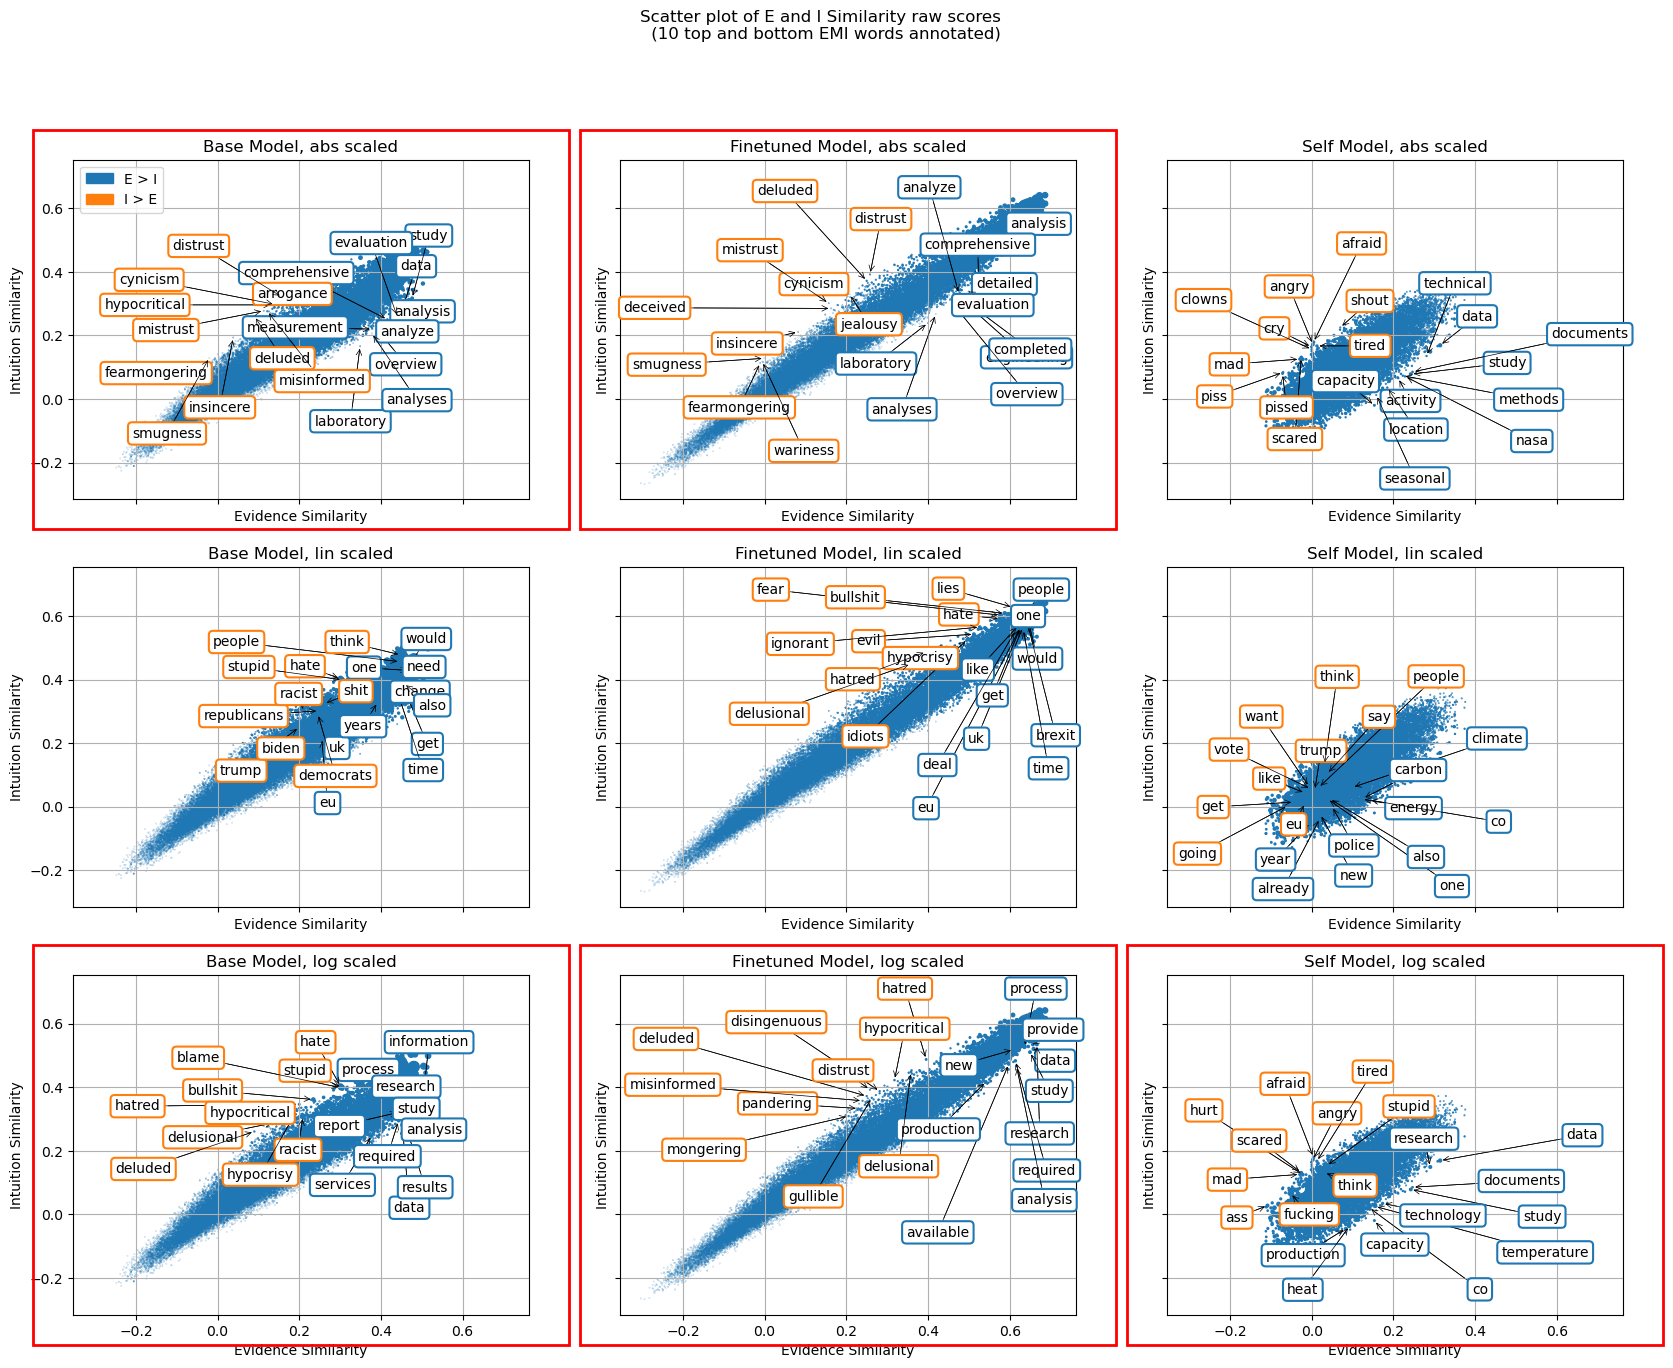

In [45]:

# top/bottom nr of words to annotate
x = 10

fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle("Scatter plot of E and I Similarity raw scores \n (10 top and bottom EMI words annotated)", fontsize=12)



# --- Plot 1: Base Model, abs---
selected_base_top_abs = filtered_df_base[filtered_df_base['word'].isin(base_merged_pos['abs'])]
selected_base_bot_abs = filtered_df_base[filtered_df_base['word'].isin(base_merged_neg['abs'])]

selected_base_abs = pd.concat([selected_base_top_abs, selected_base_bot_abs])

axes[0, 0].scatter(filtered_df_base['base_word_E'], filtered_df_base['base_word_I'], s=filtered_df_base['frequency']/100)
axes[0, 0].set_xlabel("Evidence Similarity")
axes[0, 0].set_ylabel("Intuition Similarity")

texts_base_abs = []
for _, row in selected_base_abs.iterrows():
    color = "#1F77B4" if row['base_word_E'] > row['base_word_I'] else "#FF7F0E"
    texts_base_abs.append(axes[0, 0].annotate(
        row['word'],
        (row['base_word_E'], row['base_word_I']),
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(texts_base_abs, ax=axes[0, 0], expand=(2, 2), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))


axes[0, 0].set_title("Base Model, abs scaled")
axes[0, 0].grid(True)


# --- Plot 2: Base Model, lin---
selected_base_top_lin = filtered_df_base[filtered_df_base['word'].isin(base_merged_pos['lin'])]
selected_base_bot_lin = filtered_df_base[filtered_df_base['word'].isin(base_merged_neg['lin'])]
selected_base_lin = pd.concat([selected_base_top_lin, selected_base_bot_lin])


axes[1, 0].scatter(filtered_df_base['base_word_E'], filtered_df_base['base_word_I'], s=filtered_df_base['frequency']/100)
axes[1, 0].set_xlabel("Evidence Similarity")
axes[1, 0].set_ylabel("Intuition Similarity")

texts_base_lin = []
for _, row in selected_base_lin.iterrows():
    color = "#1F77B4" if row['base_word_E'] > row['base_word_I'] else "#FF7F0E"
    texts_base_lin.append(axes[1, 0].annotate(
        row['word'],
        (row['base_word_E'], row['base_word_I']),
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(texts_base_lin, ax=axes[1, 0], expand=(2, 2), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))

axes[1, 0].set_title("Base Model, lin scaled")
axes[1, 0].grid(True)




# --- Plot 3: Base Model, log---
selected_base_top_log = filtered_df_base[filtered_df_base['word'].isin(base_merged_pos['log'])]
selected_base_bot_log = filtered_df_base[filtered_df_base['word'].isin(base_merged_neg['log'])]
selected_base_log = pd.concat([selected_base_top_log, selected_base_bot_log])


axes[2, 0].scatter(filtered_df_base['base_word_E'], filtered_df_base['base_word_I'], s=filtered_df_base['frequency']/100)
axes[2, 0].set_xlabel("Evidence Similarity")
axes[2, 0].set_ylabel("Intuition Similarity")

texts_base_log = []
for _, row in selected_base_log.iterrows():
    color = "#1F77B4" if row['base_word_E'] > row['base_word_I'] else "#FF7F0E"
    texts_base_log.append(axes[2, 0].annotate(
        row['word'],
        (row['base_word_E'], row['base_word_I']),
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(texts_base_log, ax=axes[2, 0], expand=(2, 2), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))

axes[2, 0].set_title("Base Model, log scaled")
axes[2, 0].grid(True)

# ------------------------------------------------------------
# ------------------------------------------------------------

# --- Plot 1: Finetuned Model, abs---
selected_finetuned_top_abs = filtered_df_finetuned[filtered_df_finetuned['word'].isin(finetuned_merged_pos['abs'])]
selected_finetuned_bot_abs = filtered_df_finetuned[filtered_df_finetuned['word'].isin(finetuned_merged_neg['abs'])]

selected_finetuned_abs = pd.concat([selected_finetuned_top_abs, selected_finetuned_bot_abs])

axes[0, 1].scatter(filtered_df_finetuned['finetuned_word_E'], filtered_df_finetuned['finetuned_word_I'], s=filtered_df_finetuned['frequency']/100)
axes[0, 1].set_xlabel("Evidence Similarity")
axes[0, 1].set_ylabel("Intuition Similarity")

texts_finetuned_abs = []
for _, row in selected_finetuned_abs.iterrows():
    color = "#1F77B4" if row['finetuned_word_E'] > row['finetuned_word_I'] else "#FF7F0E"
    texts_finetuned_abs.append(axes[0, 1].annotate(
        row['word'],
        (row['finetuned_word_E'], row['finetuned_word_I']),
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(texts_finetuned_abs, ax=axes[0, 1], expand=(2, 2), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))


axes[0, 1].set_title("Finetuned Model, abs scaled")
axes[0, 1].grid(True)


# --- Plot 2: Finetuned Model, lin---
selected_finetuned_top_lin = filtered_df_finetuned[filtered_df_finetuned['word'].isin(finetuned_merged_pos['lin'])]
selected_finetuned_bot_lin = filtered_df_finetuned[filtered_df_finetuned['word'].isin(finetuned_merged_neg['lin'])]
selected_finetuned_lin = pd.concat([selected_finetuned_top_lin, selected_finetuned_bot_lin])


axes[1, 1].scatter(filtered_df_finetuned['finetuned_word_E'], filtered_df_finetuned['finetuned_word_I'], s=filtered_df_finetuned['frequency']/100)
axes[1, 1].set_xlabel("Evidence Similarity")
axes[1, 1].set_ylabel("Intuition Similarity")

texts_finetuned_lin = []
for _, row in selected_finetuned_lin.iterrows():
    color = "#1F77B4" if row['finetuned_word_E'] > row['finetuned_word_I'] else "#FF7F0E"
    texts_finetuned_lin.append(axes[1, 1].annotate(
        row['word'],
        (row['finetuned_word_E'], row['finetuned_word_I']),
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(texts_finetuned_lin, ax=axes[1, 1], expand=(2, 2), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))

axes[1, 1].set_title("Finetuned Model, lin scaled")
axes[1, 1].grid(True)




# --- Plot 3: Finetuned Model, log---
selected_finetuned_top_log = filtered_df_finetuned[filtered_df_finetuned['word'].isin(finetuned_merged_pos['log'])]
selected_finetuned_bot_log = filtered_df_finetuned[filtered_df_finetuned['word'].isin(finetuned_merged_neg['log'])]
selected_finetuned_log = pd.concat([selected_finetuned_top_log, selected_finetuned_bot_log])


axes[2, 1].scatter(filtered_df_finetuned['finetuned_word_E'], filtered_df_finetuned['finetuned_word_I'], s=filtered_df_finetuned['frequency']/100)
axes[2, 1].set_xlabel("Evidence Similarity")
axes[2, 1].set_ylabel("Intuition Similarity")

texts_finetuned_log = []
for _, row in selected_finetuned_log.iterrows():
    color = "#1F77B4" if row['finetuned_word_E'] > row['finetuned_word_I'] else "#FF7F0E"
    texts_finetuned_log.append(axes[2, 1].annotate(
        row['word'],
        (row['finetuned_word_E'], row['finetuned_word_I']),
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(texts_finetuned_log, ax=axes[2, 1], expand=(2, 2), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))

axes[2, 1].set_title("Finetuned Model, log scaled")
axes[2, 1].grid(True)

# ------------------------------------------------------------
# ------------------------------------------------------------


# --- Plot 1: Self Model, abs---
selected_self_top_abs = filtered_df_self[filtered_df_self['word'].isin(self_merged_pos['abs'])]
selected_self_bot_abs = filtered_df_self[filtered_df_self['word'].isin(self_merged_neg['abs'])]

selected_self_abs = pd.concat([selected_self_top_abs, selected_self_bot_abs])

axes[0, 2].scatter(filtered_df_self['self_word_E'], filtered_df_self['self_word_I'], s=filtered_df_self['frequency']/100)
axes[0, 2].set_xlabel("Evidence Similarity")
axes[0, 2].set_ylabel("Intuition Similarity")

texts_self_abs = []
for _, row in selected_self_abs.iterrows():
    color = "#1F77B4" if row['self_word_E'] > row['self_word_I'] else "#FF7F0E"
    texts_self_abs.append(axes[0, 2].annotate(
        row['word'],
        (row['self_word_E'], row['self_word_I']),
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(texts_self_abs, ax=axes[0, 2], expand=(2, 2), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))


axes[0, 2].set_title("Self Model, abs scaled")
axes[0, 2].grid(True)


# --- Plot 2: Self Model, lin---
selected_self_top_lin = filtered_df_self[filtered_df_self['word'].isin(self_merged_pos['lin'])]
selected_self_bot_lin = filtered_df_self[filtered_df_self['word'].isin(self_merged_neg['lin'])]
selected_self_lin = pd.concat([selected_self_top_lin, selected_self_bot_lin])


axes[1, 2].scatter(filtered_df_self['self_word_E'], filtered_df_self['self_word_I'], s=filtered_df_self['frequency']/100)
axes[1, 2].set_xlabel("Evidence Similarity")
axes[1, 2].set_ylabel("Intuition Similarity")

texts_self_lin = []
for _, row in selected_self_lin.iterrows():
    color = "#1F77B4" if row['self_word_E'] > row['self_word_I'] else "#FF7F0E"
    texts_self_lin.append(axes[1, 2].annotate(
        row['word'],
        (row['self_word_E'], row['self_word_I']),
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(texts_self_lin, ax=axes[1, 2], expand=(2, 2), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))

axes[1, 2].set_title("Self Model, lin scaled")
axes[1, 2].grid(True)




# --- Plot 3: Self Model, log---
selected_self_top_log = filtered_df_self[filtered_df_self['word'].isin(self_merged_pos['log'])]
selected_self_bot_log = filtered_df_self[filtered_df_self['word'].isin(self_merged_neg['log'])]
selected_self_log = pd.concat([selected_self_top_log, selected_self_bot_log])


axes[2, 2].scatter(filtered_df_self['self_word_E'], filtered_df_self['self_word_I'], s=filtered_df_self['frequency']/100)
axes[2, 2].set_xlabel("Evidence Similarity")
axes[2, 2].set_ylabel("Intuition Similarity")

texts_self_log = []
for _, row in selected_self_log.iterrows():
    color = "#1F77B4" if row['self_word_E'] > row['self_word_I'] else "#FF7F0E"
    texts_self_log.append(axes[2, 2].annotate(
        row['word'],
        (row['self_word_E'], row['self_word_I']),
        color="black",  # Text color
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, lw=1.5),  # White background, colored border
        arrowprops=dict(arrowstyle="->", color="black", lw=0.5)
    ))

adjust_text(texts_self_log, ax=axes[2, 2], expand=(2, 2), force_text=(3.5, 3.5),
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5))

axes[2, 2].set_title("Self Model, log scaled")
axes[2, 2].grid(True)

# ------------------------------------------------------------

# Create custom legend handles
E_patch = patches.Patch(color='#1F77B4', label=f'E > I')
I_patch = patches.Patch(color='#FF7F0E', label=f'I > E')
# Add the legend
axes[0, 0].legend(handles=[E_patch, I_patch], loc='upper left')


highlighted_subplots = [(0, 0), (0, 1), (2, 0), (2, 1), (2,2)]  

for (row, col) in highlighted_subplots:
    ax = axes[row, col]  
    pos = ax.get_position()  

    rect = patches.Rectangle(
        (pos.x0 - 0.02, pos.y0 - 0.02),  # Bottom-left corner
        pos.width + 0.04,  # Width
        pos.height + 0.04,  # Height
        linewidth=2, edgecolor='red', facecolor='none'
    )

    fig.add_artist(rect)

plt.show()

***

**Interpretation:**

* EMI score
* Scaled by frequency
    * absolute
    * linear
    * logarithmic 
* Scatter of raw E and I
    * annotated highest E-I, in three scalings
 
$\to$ in the end, take documents, scale by length and compute EMI


***

***
# **Wordcloud**

* one color: positive on E & I score
* one color: negative on E&I score
* one color: different impact on both scores

In [46]:
filtered_df_base['base_EMI'] = filtered_df_base['base_word_E'] - filtered_df_base['base_word_I']
filtered_df_finetuned['finetuned_EMI'] = filtered_df_finetuned['finetuned_word_E'] - filtered_df_finetuned['finetuned_word_I']
filtered_df_self['self_EMI'] = filtered_df_self['self_word_E'] - filtered_df_self['self_word_I']


filtered_df_finetuned

word  frequency  len  \
0               eu      15495    2   
1           people      14061    6   
2               uk      13435    2   
3            would      11913    5   
4             like      10823    4   
...            ...        ...  ...   
41215        thays          1    5   
41216          plo          1    3   
41217     forfeits          1    8   
41218  molestation          1   11   
41219   processors          1   10   

                               finetuned_word_embeddings  finetuned_word_I  \
0      [-1.3737625, 0.5357196, 0.37616703, 0.62873393...          0.564230   
1      [-0.7468475, 0.7805927, -0.041292027, -1.48423...          0.601331   
2      [-0.7010123, 0.6633952, 0.1436165, 0.011551916...          0.565339   
3      [-0.99835193, 0.37731767, 0.7666058, -0.805716...          0.580731   
4      [0.15676743, 0.93127114, -1.083348, -1.4284264...          0.569575   
...                                                  ...               ...   
41215  [-0.05715904, 0.14452715, -0.3283403, -0.25922...         -0.050066   
41216  [-0.87481624, 0.45665455, 0.053036597, 0.20022...          0.075793   
41217  [0.18994524, -0.14269681, -0.03439303, 0.50678...          0.038717   
41218  [-0.011333228, 0.10779757, -0.832101, 0.352406...          0.141314   
41219  [-0.33891636, -0.52377814, 0.14993009, -0.0875...          0.170502   

       finetuned_word_E  finetuned_EMI  
0              0.626432       0.062202  
1              0.640874       0.039543  
2              0.632746       0.067406  
3              0.646070       0.065340  
4              0.621071       0.051496  
...                 ...            ...  
41215         -0.070216      -0.020150  
41216          0.065468      -0.010325  
41217          0.014322      -0.024395  
41218          0.120045      -0.021270  
41219          0.243546       0.073044  

[41220 rows x 7 columns]

In [47]:
filtered_df_base.sort_values(by = "base_EMI")

word  frequency  len  \
4247        deluded         46    7   
12823      mistrust          7    8   
6658       distrust         24    8   
3264   hypocritical         69   12   
11246      cynicism          9    8   
...             ...        ...  ...   
667            data        445    4   
24566      analyses          2    8   
9848       overview         12    8   
10698    evaluation         10   10   
12311    laboratory          8   10   

                                    base_word_embeddings  base_word_I  \
4247   [-0.40127, -0.5168, -0.15004, -0.13117, -0.254...     0.260665   
12823  [-0.40841, -0.33564, -0.53619, -0.5664, 0.1563...     0.277755   
6658   [-0.50807, -0.37221, -0.43555, -0.65465, -0.01...     0.321003   
3264   [-0.55545, -0.14079, -0.47729, -0.16664, -0.01...     0.296222   
11246  [-0.56965, -0.29286, 0.24857, -0.36676, 0.3063...     0.297634   
...                                                  ...          ...   
667    [-0.33911, -0.48369, -0.76636, 0.11083, 0.4518...     0.281115   
24566  [0.10075, 0.048951, -0.025571, 0.22181, -0.025...     0.206302   
9848   [0.49458, 0.09519, 0.13367, -0.0078502, 0.0178...     0.218573   
10698  [0.034535, -0.4694, 0.30966, -0.0018913, -0.16...     0.259674   
12311  [-0.18077, -0.33582, -0.69979, 0.39695, -0.277...     0.166401   

       base_word_E  base_EMI  
4247      0.090038 -0.170627  
12823     0.113007 -0.164748  
6658      0.157921 -0.163082  
3264      0.135465 -0.160757  
11246     0.141079 -0.156555  
...            ...       ...  
667       0.452171  0.171056  
24566     0.377762  0.171460  
9848      0.390448  0.171875  
10698     0.439871  0.180197  
12311     0.348967  0.182566  

[41183 rows x 7 columns]

In [48]:
def wordcloud_distance(df, model, normalize = True):

    # normalize
    
    # Step 2: Get color from the coolwarm colormap based on normalized score
    colormap = cm.get_cmap("coolwarm_r")  # Use the coolwarm colormap
    
    if normalize:
        df[f"{model}_normalized_score"] = (df[f"{model}_EMI"] - df[f"{model}_EMI"].min()) / (df[f"{model}_EMI"].max() - df[f"{model}_EMI"].min())
        #df[f"{model}_color"] = df[f"{model}_normalized_score"].apply(lambda x: colormap(x)[:3])  # Convert to RGBA colors
    else:
        df[f"{model}_normalized_score"] = df[f"{model}_EMI"] 
        #df[f"{model}_color"] = df[f"{model}_EMI"].apply(lambda x: colormap(x)[:3])
        
    norm = mcolors.Normalize(vmin=df[f"{model}_EMI"].min(), vmax=df[f"{model}_EMI"].max())  # Ensure color scale adapts to actual range
    df[f"{model}_color"] = df[f"{model}_normalized_score"].apply(lambda x: colormap(norm(x))[:3])  # Convert to RGB

    # Step 3: Convert words & frequencies into dictionary
    word_freq_dict = dict(zip(df["word"], df["frequency"]))
    
    # Step 4: Define color function for WordCloud
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        color_row = df.loc[df["word"] == word, f"{model}_color"]
    
        if not color_row.empty:
            rgba = color_row.values[0]  # Ensure it's a tuple (r, g, b)
    
            #print("Extracted RGBA:", rgba, type(rgba))  # Debugging step
    
            if isinstance(rgba, (list, tuple, np.ndarray)):  # Ensure it's iterable
                r, g, b = float(rgba[0]), float(rgba[1]), float(rgba[2])  # Extract RGB values
                return f"rgb({int(r * 255)}, {int(g * 255)}, {int(b * 255)})"
    
        return "black"  # Default color if word not found

    
    # Step 5: Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        color_func=color_func
    ).generate_from_frequencies(word_freq_dict)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"Word Cloud with Color Scale based on EMI Scores \n (Model: {model})")

    # **Add Colorbar**
    sm = cm.ScalarMappable(cmap=colormap, norm=mcolors.Normalize(vmin=df[f"{model}_EMI"].min(), vmax=df[f"{model}_EMI"].max()))
    sm.set_array([])  # Required for colorbar
    cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.03, pad=0.04)
    cbar.set_label("EMI Score")

    plt.show()

/tmp/ipykernel_1664/4284042935.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("coolwarm_r")  # Use the coolwarm colormap


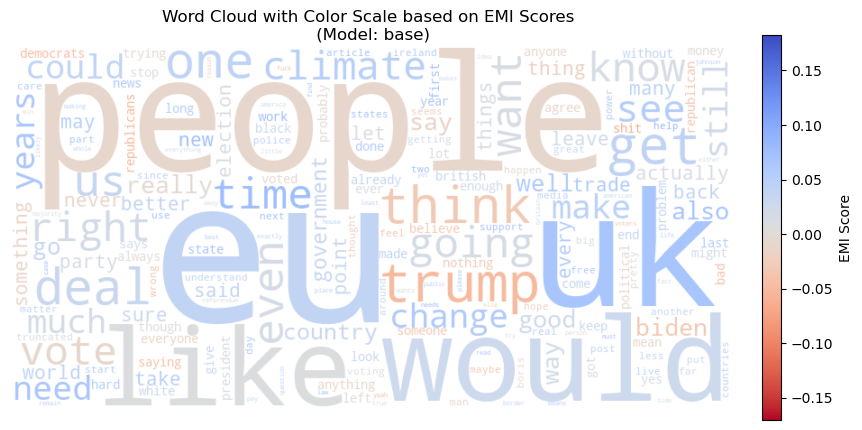

In [49]:
#wordcloud_distance(word_freq_df, 'base', normalize = True)

wordcloud_distance(filtered_df_base, 'base', normalize = False)

/tmp/ipykernel_1664/4284042935.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("coolwarm_r")  # Use the coolwarm colormap


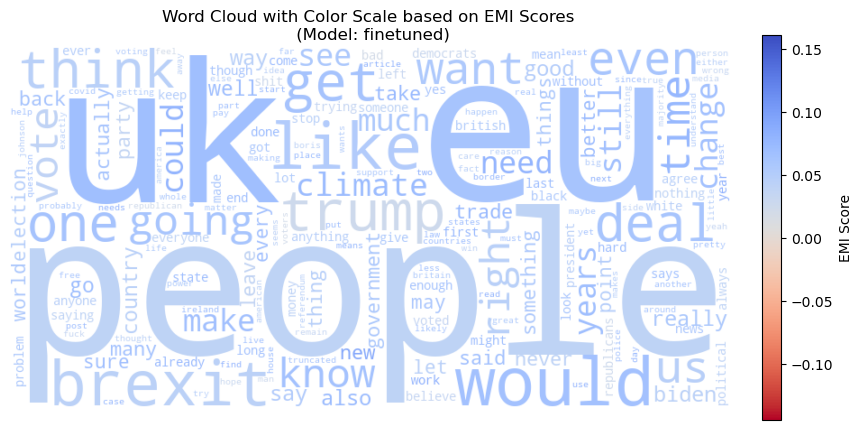

In [50]:
wordcloud_distance(filtered_df_finetuned, 'finetuned', normalize = False)

/tmp/ipykernel_1664/4284042935.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("coolwarm_r")  # Use the coolwarm colormap


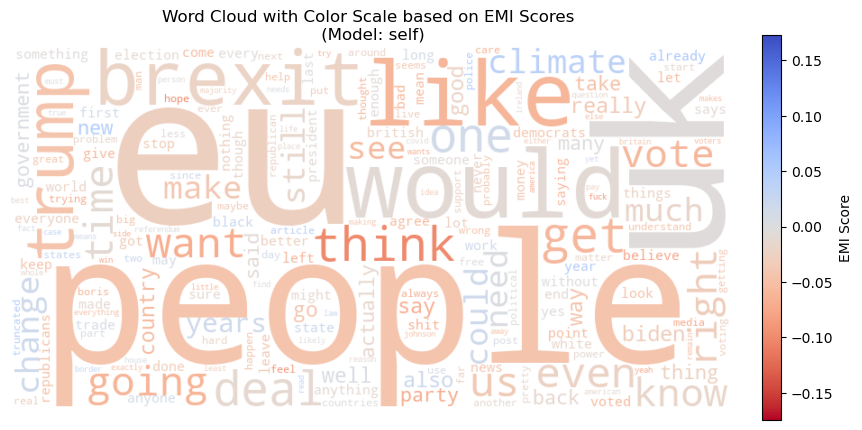

In [51]:
wordcloud_distance(filtered_df_self, 'self', normalize = False)

***
# **Exports**

In [52]:


filtered_df_base.drop(columns = ["base_normalized_score", "base_color"]).to_csv("output/advanced_base_corpus_words_encoded.csv", index = False)

filtered_df_finetuned.drop(columns = ["finetuned_normalized_score", "finetuned_color"]).to_csv("output/advanced_finetuned_corpus_words_encoded.csv", index = False)

filtered_df_self.drop(columns = ["self_normalized_score", "self_color"]).to_csv("output/advanced_self_corpus_words_encoded.csv", index = False)



## **Playing around**

In [53]:
selected_words = pd.concat([base_corpus_evidence_df_top10['word'], base_corpus_evidence_df_bottom10['word'], base_corpus_intuition_df_top10['word'], base_corpus_intuition_df_bottom10['word']])

heatmap_df = base_corpus_evidence_df[base_corpus_evidence_df['word'].isin(selected_words)].merge(
    base_corpus_intuition_df[base_corpus_intuition_df['word'].isin(selected_words)], on="word")

heatmap_df = heatmap_df.set_index("word").sort_values(by="mean_E_similarity", ascending=False)
heatmap_df

mean_E_similarity  mean_I_similarity
word                                            
fact                 0.515461           0.498581
however              0.512653           0.462810
whether              0.509191           0.445496
possible             0.508187           0.417180
understand           0.504332           0.466030
...                       ...                ...
terressa            -0.235765          -0.225136
hufty               -0.236949          -0.215209
trollolol           -0.238182          -0.186839
potholer            -0.241754          -0.211945
myeh                -0.247788          -0.215263

[66 rows x 2 columns]

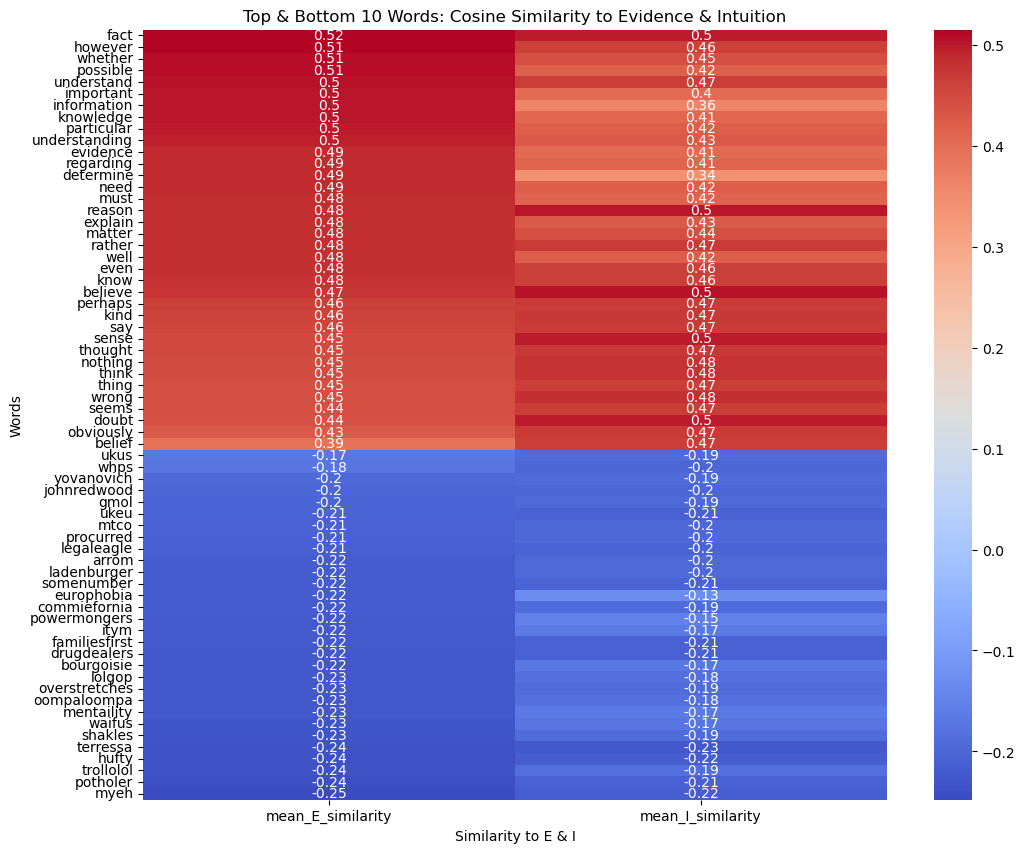

In [54]:
selected_words = pd.concat([base_corpus_evidence_df_top10['word'], base_corpus_evidence_df_bottom10['word'], base_corpus_intuition_df_top10['word'], base_corpus_intuition_df_bottom10['word']])

heatmap_df = base_corpus_evidence_df[base_corpus_evidence_df['word'].isin(selected_words)].merge(
    base_corpus_intuition_df[base_corpus_intuition_df['word'].isin(selected_words)], on="word")

heatmap_df = heatmap_df.set_index("word").sort_values(by="mean_E_similarity", ascending=False)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.title("Top & Bottom 10 Words: Cosine Similarity to Evidence & Intuition")
plt.xlabel("Similarity to E & I")
plt.ylabel("Words")
plt.show()